# Simple linear regression

## Introduction

In the previous chapter, we explored the concept of **correlation**, which measures the strength and direction of the linear relationship between two variables. Now, we'll delve into **simple linear regression**, a powerful technique that allows us to go beyond merely describing the relationship to actually modeling it.

One way to think about linear regression is that it fits the "best line" through a scatter plot of data points. This line, often called the **regression line**, captures the essence of the linear relationship between the variables. Imagine drawing a line through a cloud of points - linear regression finds the line that minimizes the overall distance between the points and the line itself.

But there's more to it than just drawing a line. Linear regression also provides a **model** that represents the relationship mathematically. So, another way to look at linear regression is that it fits this simple model to the data, aiming to determine the most likely values of the parameters that define the model. These estimated parameters provide valuable insights into the relationship between the variables.

In this chapter, we'll explore the key concepts of simple linear regression, including:

- Estimating the regression coefficients: we'll learn how to calculate the best-fitting line using the method of **ordinary least squares (OLS)** in Python.
- Assessing model fit: we'll revisit **R-squared** and introduce other metrics to evaluate how well the model captures the data.
- Assumptions and diagnostics: we'll briefly recap the key assumptions of linear regression and learn how to diagnose potential violations.
- Inference and uncertainty: we'll explore **confidence intervals** and **hypothesis testing** to quantify the uncertainty associated with the estimated coefficients.
- Making predictions: we'll see how to use the fitted model to predict values of the dependent variable for new values of the independent variable.
- Advanced techniques: we'll touch upon topics like **regularization** and **maximum likelihood estimation (MLE)** to enhance model fitting.

## Fitting model to data

### Theory and definitions

In simple linear regression, we aim to **model** the relationship between a **response variable** ($y$) and a **covariate** ($x$). Our measurements of these variables are not perfect and contain some inherent **noise** ($\epsilon$). We can express this relationship mathematically as:

$$y = f(x) + \epsilon$$

where $f(x)$ is the **regression function** that describes the relationship between $x$ and $y$. This equation essentially states that the observed response is a combination of a systematic component and a random component.

In this chapter we focus on **linear combination**, a specific type of regression function. For example, we can model insulin sensitivity (the **dependent variable**) *as a function of* the percentage of C20-22 fatty acids (the **independent variable**). This simple linear regression model can be written as:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

where:

- $y_i$ represents the insulin sensitivity **response variable** for the $i$-th individual
- $x_i$ represents the percentage of C20-22 fatty acids **covariate** for the $i$-th individual
- $\beta_0$ is the **intercept**, representing the value of $y$ when $x$ is zero
- $\beta_1$ is the **slope** of the line, representing the change in $y$ *for a one-unit change* in $x$
- $\epsilon_i$ is the random error for the $i$-th individual

The intercept ($\beta_0$) and slope ($\beta_1$) are the **parameters** of the model, and our goal is to estimate their true values from the data. We assume that the errors ($\epsilon_i$) are independent and follow a Gaussian distribution with a *mean of zero*: $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

We can generalize the simple linear regression model to include multiple covariates, to model more complex relationships. This allows us to consider the relationship between the response variable and multiple predictors simultaneously. The model with $p$ covariates can be written as:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i \\
$$

where:

- $y_i$ is the response variable for the $i$-th observation
- $x_{i1}, x_{i2}, ..., x_{ip}$ are the values of the $p$ covariates for the $i$-th observation
- $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients, including the intercept ($\beta_0$)
- $\epsilon_i$ is the error term for the $i$-th observation

This can be expressed more compactly using summation notation:

$$
y_i = \beta_0 + \sum \beta_p x_{ip} + \epsilon_i
$$

Note that $\beta_0 = \beta_0 \times 1$, so this coefficient can be integrated into the sum, therefore the regression function can be expressed in matrix notation as:

$$
f(\mathbf{x}_i, \boldsymbol{\beta}) = \beta_0 + \sum \beta_p x_{i,p} = \mathbf{x}_i^T \boldsymbol{\beta}
$$

where:

- $\mathbf{x}_i = \begin{bmatrix} 1 & x_{i1} & x_{i2} & \dots & x_{ip} \end{bmatrix}^T$ is the **covariate vector** for the $i$-th observation, including 1 for the intercept
- $\boldsymbol{\beta} = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2 & \dots & \beta_p \end{bmatrix}^T$ is the **vector of regression coefficients**, including the intercept

In linear models, the function $f(\mathbf{x}_i, \boldsymbol{\beta})$ is designed to model how the *average* value of  $y$ changes with $x$. The error term  $\epsilon$ accounts for the fact that individual data points will deviate from this average due to random variability. Essentially, we're using a linear function to *model the mean response*, while acknowledging that there will always be some unpredictable variation around that mean.

Finally, the relationship between the response variable and multiple predictors for all observations in the dataset can be expressed even more concisely in matrix notation as:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where:
- $\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ is the vector of response variables
- $\mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{12} & \dots & x_{1p} \\ 1 & x_{21} & x_{22} & \dots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \dots & x_{np} \end{bmatrix}$ is the design matrix
- $\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{bmatrix}$ is the vector of regression coefficients
- $\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}$ is the vector of error terms

### Least squares

How do we actually find the "best" values for the parameters that accurately capture this relationship? **Ordinary least squares (OLS)** provides a method for estimating these coefficients by _minimizing the sum of the squared differences (the **sum of squared errors (SSE)**, or **sum of squared residuals**) between the observed data points and the values predicted by the regression line_:

$$S(\boldsymbol{\beta}) = \sum_{i=1}^{n} [y_i - f(\mathbf{x}_i, \boldsymbol{\beta})]^2 = \sum_{i=1}^{n} \epsilon_i^2$$


$S(\boldsymbol{\beta})$ is a measure of the overall discrepancy between the observed data points ($y_i$) and the values predicted by the regression model. Squaring the residuals ensures that positive and negative differences contribute equally to the overall measure of discrepancy. In simpler terms, imagine we have a scatter plot of data points and we draw a line through them. $S(\boldsymbol{\beta})$ represents the total sum of the squared vertical distances between each point and the line. OLS aims to find the line, i.e., the values of $\boldsymbol{\beta}$, that makes this total distance as small as possible. Mathematically, we're looking for:

$$\hat{\beta}=\text{argmin}_{\beta}S(\boldsymbol{\beta})$$

The 'hat' notation is used to denote an **estimate** of a true value. So, $\hat{\beta}$ represents the estimated value of the regression coefficients, while $\hat{y}$ represents the estimated or predicted value of the response variable based on our model.

Using the vector and matrix notation, we can write:

$$S(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) = \boldsymbol{\epsilon}^T\boldsymbol{\epsilon}$$

When the system is *overdetermined*, i.e., more data points than coefficients, [an analytical solution exists](https://en.wikipedia.org/wiki/Ordinary_least_squares#Matrix/vector_formulation) for $\boldsymbol{\beta}$. Indeed, we can find this minimum by taking the derivative of $S(\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$, setting it to zero, and solving for $\boldsymbol{\beta}$. This process is similar to finding the minimum point of a curve, where the slope, i.e., the derivative, is zero.

More formally, we calculate the **gradient** of the function $S(\boldsymbol{\beta})$: $\nabla_{\boldsymbol{\beta}} S(\boldsymbol{\beta})$.
This gradient is a vector containing the *partial derivatives* of $S(\boldsymbol{\beta})$ with respect to each element of $\boldsymbol{\beta}$. Setting this gradient to zero, i.e., $\nabla_{\boldsymbol{\beta}} S(\boldsymbol{\beta})$, gives us a system of equations that we can solve to find the values of $\boldsymbol{\beta}$ that minimize $S(\boldsymbol{\beta})$:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In simple linear regression with one predictor variable, the design matrix $\mathbf{X}$ and the parameter vector $\boldsymbol{\beta}$ have the following forms:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}

\qquad

\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
$$

To apply the matrix formula $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$, we need to calculate different parts:

$$
\begin{aligned}
\mathbf{X}^T \mathbf{X} &= \begin{bmatrix}
1 & 1 & \dots & 1 \\
x_1 & x_2 & \dots & x_n
\end{bmatrix}

\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix} =

\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix} \\

(\mathbf{X}^T \mathbf{X})^{-1} &= \frac{1}{n\sum x_i^2 - (\sum x_i)^2} \begin{bmatrix} \sum x_i^2 & -\sum x_i \\ -\sum x_i & n \end{bmatrix} \\

\mathbf{X}^T \mathbf{y} &= \begin{bmatrix}
1 & 1 & \dots & 1 \\
x_1 & x_2 & \dots & x_n
\end{bmatrix}

\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} = \begin{bmatrix}
\sum y_i \\
\sum x_i y_i
\end{bmatrix}
\end{aligned}
$$

Substituing these components back into the matrix equation and perform the matrix multiplication and inverse to obtain the following equations for $\hat{\beta_0}$ and $\hat{\beta_1}$:

$$
\hat{\beta}_1 = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2} = \frac{s_{xy}}{s^2_x}
\qquad
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

where:

- $\bar{x}$ is the **mean** of the predictor variable $x$
- $\bar{y}$ is the **mean** of the response variable $y$
- $s_{xy}$ is the **covariance** between $x$ and $y$
- $s^2_x$ is the **variance** of $x$

These equations provide a direct way to calculate the intercept and slope in simple linear regression. Recall that covariance measures the direction and strength of the linear relationship between two variables, and variance measures the spread or variability of a single variable. The slope estimate ($\hat{\beta}_1$) is the ratio of the covariance between $x$ and $y$ to the variance of $x$. The intercept estimate ($\hat{\beta}_0$) is then calculated based on the slope and the means of $x$ and $y$.

### Calculating coefficients in Python

Now that we've explored the theoretical foundations of simple linear regression and how to estimate the coefficients using OLS, let's dive into some practical applications using Python. We'll use the same dataset from the previous chapter on correlation analysis, where we examined the relationship between insulin sensitivity and the percentage of C20-22 fatty acids in muscle phospholipids.

#### Dataset

In the previous chapter, we explored the relationship between insulin sensitivity and the percentage of C20-22 fatty acids in muscle phospholipids using data from [Borkman and colleagues](https://pubmed.ncbi.nlm.nih.gov/8418404/). We visualized this relationship with scatterplots and quantified its strength and direction using correlation coefficients. Remember that correlation analysis treats both variables symmetrically, and it doesn't assume a cause-and-effect relationship or a direction of influence.

Now, we'll take this exploration a step further with simple linear regression. Instead of just describing the association, we'll build a model that *predicts insulin sensitivity based on the percentage of C20-22 fatty acids*. This implies a **directional relationship**, where we're specifically interested in how changes in fatty acid composition might affect insulin sensitivity.

While correlation provides a valuable starting point for understanding the relationship between two variables, linear regression offers a more powerful framework for modeling and predicting that relationship:

- Estimate the strength and direction of the effect: we can quantify how much insulin sensitivity is expected to change for a given change in fatty acid composition.
- Make predictions: we can use the model to predict insulin sensitivity for new individuals based on their fatty acid levels.
- Test hypotheses:we can formally test whether there is a statistically significant relationship between the variables.

In [1]:
import pandas as pd

# Example data from the book, page 319 (directly into a DataFrame)
data = pd.DataFrame({
    # percentage of C20-22 fatty acids
    'per_C2022_fatacids': [17.9, 18.3, 18.3, 18.4, 18.4, 20.2, 20.3, 21.8, 21.9, 22.1, 23.1, 24.2, 24.4],
    # insulin sensitivity index
    'insulin_sensitivity': [250, 220, 145, 115, 230, 200, 330, 400, 370, 260, 270, 530, 375],
})

data.head()

,per_C2022_fatacids,insulin_sensitivity
0,17.9,250
1,18.3,220
2,18.3,145
3,18.4,115
4,18.4,230


#### SciPy

The SciPy package provides basic statistical functions, including [a function for simple linear regression](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In [2]:
from scipy.stats import linregress

# Load the data
X = data['per_C2022_fatacids']
y = data['insulin_sensitivity']

# Calculate the coefficients (we will discuss the metrics in a subsequent section)
results_scipy = linregress(X, y)
slope_scipy, intercept_scipy, *_ = results_scipy # Extract the coefficients

# print(res)  # Print the entire result set
print("Intercept:", intercept_scipy)
print("Slope:", slope_scipy)

Intercept: -486.54199459921034
Slope: 37.20774574745539


The `linregress` function provides the estimated coefficients for our regression model. In this case, we find a slope of 37.2. This means that for every 1 unit increase in the percentage of C20-22 fatty acids in muscle phospholipids, we expect, on average, a 37.2 mg/m²/min increase in insulin sensitivity.

The intercept value we obtain is -486.5. However, in this specific example, the intercept doesn't have a clear biological interpretation. It represents the estimated insulin sensitivity when the percentage of C20-22 fatty acids is zero, which is not a realistic scenario in this context. It's important to remember that **extrapolating** the linear model beyond the range of the observed data can lead to unreliable conclusions.

These results suggest a positive association between the percentage of C20-22 fatty acids and insulin sensitivity within the observed data range. However, to fully understand the reliability and significance of this relationship, we'll need to further explore the model's fit and perform statistical inference.

#### Pingouin

The [`pingouin.linear_regression` function provides a more user-friendly output than SciPy](https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html), presenting the regression results in a convenient table format. While SciPy returns only the core statistics, i.e., slope, intercept, r-value, p-value, and standard errors, Pingouin provides a more comprehensive output, including additional information such as t-values, adjusted r-squared, and confidence intervals for the coefficients, all organized in a clear and easy-to-read table.

In [3]:
import pingouin as pg

model_pingouin = pg.linear_regression(
    X=X,
    y=y,
    remove_na=True,
    coef_only=False,  # Otherwise returns only the intercept and slopes values
    as_dataframe=True,  # Otherwise returns a dictionnay of results
    alpha=.05,
)

pg.print_table(model_pingouin)

names                   coef       se       T    pval     r2    adj_r2    CI[2.5%]    CI[97.5%]
------------------  --------  -------  ------  ------  -----  --------  ----------  -----------
Intercept           -486.542  193.716  -2.512   0.029  0.593     0.556    -912.908      -60.176
per_C2022_fatacids    37.208    9.296   4.003   0.002  0.593     0.556      16.748       57.668



The Pingouin output provides us with more detailed information about the regression model, including the 95% confidence interval for the slope and the intercept. This interval, ranging from 16.748 to 57.668, gives us a range of plausible values for the true slope of the relationship between %C20-22 fatty acids and insulin sensitivity *in the population*. The fact that this interval *does not include zero* provides further support for a relationship between these variables. If the interval included zero, it would suggest that the observed slope could plausibly be due to chance alone.

We also see that the R-squared value is 0.593. This means that 59% of the variability in insulin sensitivity can be explained by the linear relationship with %C20-22 fatty acids. The remaining 41% of variability could be due to other factors not included in the model, measurement error, or simply natural biological variation. R² and other metrics will be discussed in more details in the next section.

Finally, the P value associated with the slope is 0.002. This P value tests the null hypothesis that there is no relationship between %C20-22 fatty acids and insulin sensitivity. In this case, the very small P value provides strong evidence against the null hypothesis, suggesting that the observed relationship is unlikely to be due to random chance.

We'll discuss the calculation and interpretation of standard errors, confidence intervals and P values in more detail later in the chapter.

#### Statsmodels

While SciPy and Pingouin provide tools for linear regression, they don't offer a comprehensive summary output like the one we see in Statsmodels. Statsmodels, with its focus on statistical modeling, provides a dedicated `OLS` class (within the [`statsmodels.regression.linear_model` module](https://www.statsmodels.org/stable/regression.html#)) that not only calculates the regression coefficients but also generates a detailed summary table containing a wide range of statistical information about the model.

In order to utilize the convenience of R-style formulas for defining our regression model, we import the `formula.api` module from `statsmodels` and assign it the alias `smf`. This allows us to specify the model in a more concise and readable way, similar to how it's done in the R programming language.

In [4]:
import statsmodels.formula.api as smf
import warnings

# Suppress all UserWarnings, incl. messages related to small sample size
warnings.filterwarnings("ignore", category=UserWarning)

model_statsmodels = smf.ols("insulin_sensitivity ~ per_C2022_fatacids", data=data)
results_statsmodels = model_statsmodels.fit()

#print(results.summary())  # Classical output of the result table
print(results_statsmodels.summary2())

                    Results: Ordinary least squares
Model:               OLS                  Adj. R-squared:      0.556   
Dependent Variable:  insulin_sensitivity  AIC:                 151.2840
Date:                2024-11-29 10:34     BIC:                 152.4139
No. Observations:    13                   Log-Likelihood:      -73.642 
Df Model:            1                    F-statistic:         16.02   
Df Residuals:        11                   Prob (F-statistic):  0.00208 
R-squared:           0.593                Scale:               5760.1  
-----------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-----------------------------------------------------------------------
Intercept          -486.5420 193.7160 -2.5116 0.0289 -912.9081 -60.1759
per_C2022_fatacids   37.2077   9.2959  4.0026 0.0021   16.7475  57.6680
-----------------------------------------------------------------------
Omnibus:    

The `statsmodels` OLS summary provides a wealth of information about the fitted regression model in three key sections:

1. Model summary - This section provides an overall assessment of the model's fit
2. Coefficients table - This table provides detailed information about each coefficient
3. Model diagnostics - This section includes several diagnostic tests to assess the validity of the model assumptions

By carefully examining these different sections of the `statsmodels` OLS summary, we can gain a comprehensive understanding of the fitted regression model, its performance, and the validity of its underlying assumptions.

We can access each of these sections individually using the `tables` attribute, which is a list containing each table as a separate element. In addition, the `params` attribute of the fitted statsmodels object stores the estimated regression coefficients. For example, to access the table with the coefficients, their standard errors, t-values, P values, and confidence intervals.

In [5]:
# Get the coefficients table
coef_table_statsmodels = results_statsmodels.summary().tables[1]

# Print the coefficients table
print(coef_table_statsmodels)

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -486.5420    193.716     -2.512      0.029    -912.908     -60.176
per_C2022_fatacids    37.2077      9.296      4.003      0.002      16.748      57.668


By carefully examining the coefficient table, we can gain valuable insights into the magnitude, significance, and uncertainty of the relationships between the predictor variables and the response variable:

- 'coef': this column displays the estimated values of the regression coefficients. In simple linear regression, we have two coefficients: the intercept (`Intercept`) and the slope associated with the predictor variable (in our case, `per_C2022_fatacids`).
- 'std err': this column shows the standard errors of the coefficient estimates. The standard error is a measure of the uncertainty or variability associated with each estimate. Smaller standard errors indicate more precise estimates.
- 't': this column presents the t-values for each coefficient. The t-value is calculated by dividing the coefficient estimate by its standard error. It's used to test the null hypothesis that the true coefficient is zero.
- 'P>|t|': this column displays the P values associated with the t-tests. The P value represents the probability of observing the estimated coefficient (or a more extreme value) if the true coefficient were actually zero. A low P value (typically below 0.05) suggests that the predictor variable has a statistically significant effect on the response variable.
- '[0.025   0.975]': this column shows the 95% confidence intervals for the true values of the coefficients. The confidence interval provides a range of plausible values within which we can be 95% confident that the true coefficient lies.

Note that the calculation of the standard errors, t-values, P values, and confidence intervals in this table relies on the assumption that the errors in the regression model are normally distributed. We will discuss these values later in this chapter.

We can also directly display the estimated intercept and slope.

In [6]:
# Print the parameters
print("The parameters of the model")
print(results_statsmodels.params)

The parameters of the model
Intercept            -486.541995
per_C2022_fatacids     37.207746
dtype: float64


#### NumPy

[NumPy offers the `numpy.polyfit` function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) that fits a polynomial of a specified degree to the data. In our case, we use `deg=1` to fit a straight line (a polynomial of degree 1). It returns an array of polynomial coefficients with the highest power first, i.e., slope followed by intercept. The function integrates well with plotting libraries like Matplotlib. We can easily use the returned coefficients to generate the equation of the line and plot it alongside the data.

So for simple linear regression, `numpy.polyfit` can be more concise than SciPy, Pingouin or `statsmodels`, especially if the primary goal is to obtain the coefficients for plotting or basic calculations.

Slope (NumPy): 37.20774574745538
Intercept (NumPy): -486.54199459921


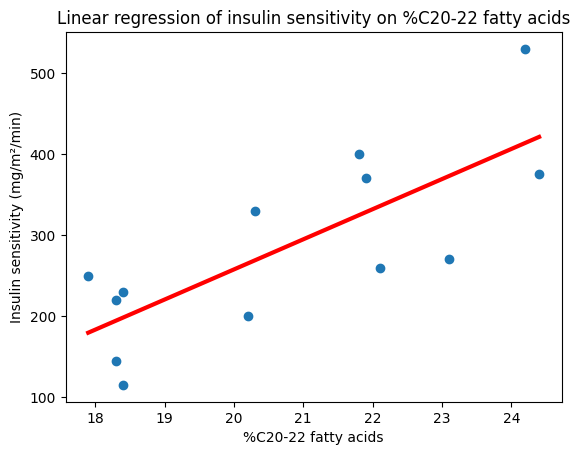

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the model using numpy.polyfit
coefficients_numpy = np.polyfit(X, y, deg=1)  # deg=1 specifies a linear fit (degree 1)
slope_numpy, intercept_numpy = coefficients_numpy

print("Slope (NumPy):", slope_numpy)
print("Intercept (NumPy):", intercept_numpy)

# Plot the data and the fitted line
plt.scatter(X, y)
plt.plot(X, slope_numpy * X + intercept_numpy, color="red", lw=3)
plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Linear regression of insulin sensitivity on %C20-22 fatty acids");

## Assessing model fit

Now that we've visualized the relationship between insulin sensitivity and %C20-22 fatty acids and explored different ways to estimate the regression coefficients, it's crucial to assess how well our model actually fits the data. This step helps us determine *how effectively the model captures the underlying relationship* and *how reliable it is for making predictions*.

The Statsmodels library provides a comprehensive summary output that offers valuable insights into these aspects. Let's take a look at the first table from this output, which provides an overall summary of the model's fit.

In [8]:
# Get the coefficients table
assessment_table_statsmodels = results_statsmodels.summary().tables[0]

# Print the coefficients table
print(assessment_table_statsmodels)

                             OLS Regression Results                            
Dep. Variable:     insulin_sensitivity   R-squared:                       0.593
Model:                             OLS   Adj. R-squared:                  0.556
Method:                  Least Squares   F-statistic:                     16.02
Date:                 Fri, 29 Nov 2024   Prob (F-statistic):            0.00208
Time:                         10:34:13   Log-Likelihood:                -73.642
No. Observations:                   13   AIC:                             151.3
Df Residuals:                       11   BIC:                             152.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         


The model summary provides an overall assessment of the fitted regression model:

- 'R-squared': this familiar metric denoted as **R²**, also known as the **coefficient of determination**, quantifies the proportion of variance in the response variable that is explained by the predictor variable(s). It ranges from 0 to 1, where a higher value indicates a better fit.
- 'Adj. R-squared': the adjusted R² is a modified version of R² that takes into account the number of predictors in the model. It penalizes the addition of unnecessary predictors that don't significantly improve the model's explanatory power, helping to prevent overfitting.
- 'F-statistic': this statistic tests the overall significance of the regression model. It assesses whether at least one of the predictor variables has a non-zero coefficient, meaning it has a statistically significant effect on the response variable. This is conceptually similar to the F-test we encountered in the chapter on comparing two unpaired means, where we tested for the equality of variances.
- 'Prob (F-statistic)': this is the p-value associated with the F-statistic. A low P value (typically below 0.05) provides evidence that the model as a whole is statistically significant, meaning that at least one of the predictors is likely to have a real effect on the response variable.
- 'Log-Likelihood': this value reflects how well the model fits the observed data, assuming that the errors are normally distributed. A higher log-likelihood indicates a better fit.
- 'AIC': the Akaike Information Criterion (AIC) is a measure of model fit that penalizes models with more parameters. It's useful for comparing different models, even if they are not nested. Lower AIC values generally indicate a better balance between model fit and complexity. We encountered AIC before in the chapter on comparing survival curves, where it provided valuable guidance in model selection.
- 'BIC': the Bayesian Information Criterion (BIC) is similar to AIC but imposes a stronger penalty for models with more parameters. Like AIC, lower BIC values are generally preferred.

By examining these summary statistics, we can gain an overall understanding of the model's performance, its explanatory power, and its statistical significance.

### R-squared

In the model summary table, we see several metrics that provide insights into the model's fit. One of the most commonly used metrics is **R²**, which quantifies the proportion of variance in the response variable explained by the predictor variable.

Note that, while sometimes denoted as r² in the context of simple linear regression, we'll use R² throughout this chapter for consistency.

We can extract the correlation of coefficient (Pearson's r) calculated by `scipy.stats.linregress` and square it, or get the R² attribute of the fitted Statsmodel object and the Pingouin's result table.

In [83]:
# Calculate R-squared from scipy.stats results
r_value_scipy = results_scipy.rvalue # type: ignore
r_squared_scipy = r_value_scipy**2

# Print R-squared values from different packages
print(f"R² (SciPy):\t {r_squared_scipy:.4f}")
print(f"R² (Pingouin):\t {model_pingouin.r2.iloc[1]:.4f}")

R² (SciPy):	 0.5929
R² (Pingouin):	 0.5929


While Python libraries provide convenient ways to obtain R², it's also helpful to understand how it's calculated manually. This provides deeper insight into the meaning of R² and its connection to the concept of variance.

Recall from the previous chapter that **Pearson's correlation coefficient** is calculated by dividing the **covariance** of two variables by the product of their **standard deviations**. R² is simply the square of this correlation coefficient:

$$
r = \frac{s_{xy}}{s_x s_y}
\qquad
R^2 = \frac{s^2_{xy}}{s^2_x s^2_y}
$$

Let's define the **total sum of squares (TSS)** as a measure of the total variability of the response variable (y) around its mean, the the **residual sum of squares (RSS)**, also called **sum of squared residuals (SSR)**, as a measure of the variability in y that is not explained by the regression model:

$$
\text{TSS} = \sum{(y_i - \bar{y})^2}
\qquad
\text{RSS} = \sum{(y_i - \hat{y}_i)^2}
$$

where $y_i$ is the $i$-th observed value of $y$, $\bar{y}$ is the mean of $y$, and $\hat{y}_i$ is the $i$-th predicted/estimated value of $y$ from the regression model.

The key connection is that the variance of y ($s^2_y$) is directly proportional to TSS, as we have seen in the chapter about the quantification of scatter of continuous data with the definition of the sample variance:

$$s^2_y = \frac{1}{n-1}\sum(y_i - \bar y)^2 = \frac{\text{TSS}}{n-1}$$

where $n$ is the number of observations. Moreover, we can substitute the expression of the predicted value fror the $i$-th observation into the RSS formula using the OLS estimates for the intercept and slope:

$$
\begin{aligned}
\hat{y}_i &= \hat \beta_0 + \hat \beta_1 x_i = (\bar y - \hat \beta_1 \bar x) + \beta_1 x_i \\
\text{RSS} &= \sum{(y_i - \hat{y}_i)^2} \\
&=\sum{[y_i - (\bar y - \hat \beta_1 \bar x + \beta_1 x_i)]^2} \\
&= \sum{[(y_i - \bar y) - \hat \beta_1 (x_i - \bar x)]^2} \\
&= \sum{(y_i - \bar y)^2 + (\hat \beta_1 (x_i - \bar x))^2 - 2 (y_i - \bar y) \hat \beta_1 (x_i - \bar x)} \\
&= \sum{(y_i - \bar y)^2} + \hat \beta_1^2 \sum{(x_i - \bar x)^2} - 2 \hat \beta_1 \sum{(y_i - \bar y) (x_i - \bar x)} \\
&= \text{TSS} + \hat \beta_1^2 (n - 1) s^2_x - 2 \hat \beta_1 (n - 1) s_{xy} \\
&= \text{TSS} + s^2_{xy}/(s^2_x)\cancel{^2} (n - 1) \cancel{s^2_x} - 2 s_{xy}/s^2_x (n - 1) s_{xy} \\
&= \text{TSS} - (n - 1) s_{xy}^2 / s^2_x \\
&= \text{TSS} - R^2 (n - 1) s^2_y \\
\text{RSS} &= \text{TSS} - R^2 \text{TSS} \\

R^2 &= \frac{\text{TSS} -\text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{aligned}
$$

The code snippet below demonstrates how to calculate R² manually using the `compute_rss` and `estimate_y` functions. It uses the intercept and slope estimated coefficients from the NumPy results to calculate the predicted values, and subsequently the RSS. Finally, it calculates TSS and uses both RSS and TSS to compute R-squared.

In [10]:
# Define functions to compute RSS and estimate y
def compute_rss(y_estimate, y):
  return sum(np.power(y - y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

# Calculate RSS and TSS
rss = compute_rss(estimate_y(X, intercept_numpy, slope_numpy), y)
tss = np.sum(np.power(y - y.mean(), 2))

# Calculate and print R-squared
print(f"TSS (manual calculation): {tss:.4f}")
print(f"RSS (manual calculation): {rss:.4f}")
print(f"R² using TSS and RSS: {1 - rss/tss:.4f}")

TSS (manual calculation): 155642.3077
RSS (manual calculation): 63361.3740
R² using TSS and RSS: 0.5929


We can also access the R², TSS, and RSS values [directly from the Statsmodels results object](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) using its `rsquared`, `centered_tss`, and `ssr` attributes, respectively. This provides a convenient way to retrieve these key metrics for further analysis or comparison.

In [11]:
# Print R², TSS, and RSS from statsmodels attributes
print(f"TSS (Statsmodels): {results_statsmodels.centered_tss:.4f}")
print(f"RSS (Statsmodels): {results_statsmodels.ssr:.4f}")
print(f"R² (Statsmodels): {results_statsmodels.rsquared:.4f}")

TSS (Statsmodels): 155642.3077
RSS (Statsmodels): 63361.3740
R² (Statsmodels): 0.5929


To assess how well our regression model explains the outcome (insulin sensitivity), we can compare it to a simple baseline model: **predicting the mean**. Imagine we have no information about the predictor variable (%C20-22 fatty acids). In this case, the best prediction we could make for any individual's insulin sensitivity would be the overall mean insulin sensitivity.

This "mean model" is represented by a **horizontal line** on the scatter plot, and the deviations of the data points from this line represent the *residuals around the mean*. The variance of the response variable, denoted as $s^2_y$, quantifies the average squared error of this mean model.

By comparing the variability explained by our regression model (captured by R²) to the variability around the mean (captured by $s^2_y$), we can gauge how much better our model performs than simply predicting the mean. 

We'll explore this concept in more detail and discuss other methods for comparing models in the next chapter. For now let's have a look at other metrics can help us assess model fit.

### Adjusted R-squared

While R² provides a useful measure of how well a model fits the data, it has a drawback: it always increases when we add more predictors to the model, even if those predictors don't truly improve the model's explanatory power. This can lead to **overfitting**, where the model performs well on the training data but poorly on new, unseen data.

**Adjusted R² ($R^2_a$)** addresses this issue by taking into account the *number of predictors* in the model. It **penalizes** the addition of unnecessary predictors that don't contribute significantly to explaining the variation in the response variable. This helps to prevent overfitting and provides a more realistic assessment of the model's goodness-of-fit.

The formula for adjusted R² is:

$$
R^2_a = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}
$$

where $R^2$ is the R-squared value, $n$ is the number of observations in the dataset, and $p$ is the number of predictor variables in the model.

Note that $n - p - 1$ is the **degrees of freedom of the residuals**. It accounts for the fact that we've estimated $p + 1$ parameters (including the intercept) in the regression model. In simple linear regression (where $p = 1$), we've estimated two parameters, the intercept and the slope. Using degrees of freedom provides a more accurate estimate of the population variance of the errors. When we estimate parameters from the data, we lose some degrees of freedom, as the estimated parameters impose constraints on the residuals. We can extract the degrees of freedom of the residuals from the fitting model results.

Adjusted R² can be interpreted as the proportion of the variance in the response variable explained by the predictors, *adjusted for the number of predictors*. It ranges from $-\inf$ to 1, where a higher value indicates a better fit. Unlike R², adjusted R² can decrease if adding a new predictor doesn't improve the model's explanatory power sufficiently to offset the penalty for increased complexity.

In [88]:
# Get number of observations
n = results_statsmodels.nobs  # Number of observations; also n=len(data)
#p = 1  # Number of predictors in simple linear regression
df_residuals = results_statsmodels.df_resid  #  degrees of freedom of the residuals

# Calculate adjusted R²
#adjusted_r_squared = 1 - (1 - r_squared_scipy) * (n - 1) / (n - p - 1)
adjusted_r_squared = 1 - (1 - r_squared_scipy) * (n - 1) / df_residuals

# Print adjusted R² from manual calculation, and from Pingouin and Statsmodels
print(f"Adjusted R² (manual):\t  {adjusted_r_squared:.4f}")
print(f"Adjusted R² (pingouin):\t  {model_pingouin.adj_r2[1]:.4f}")
print(f"Adjusted R² (Statsmodels):{results_statsmodels.rsquared_adj:.4f}")

Adjusted R² (manual):	  0.5559
Adjusted R² (pingouin):	  0.5559
Adjusted R² (Statsmodels):0.5559


In our simple linear regression example, the adjusted R² is slightly lower than the R² value. This is because adjusted R² applies a small penalty even for having one predictor. However, the primary interpretation of R², i.e., the proportion of variance explained, remains the same. The true benefit of adjusted R² will become clearer when we compare models with multiple predictors in later chapters.

### Mean squared error

**Mean Squared Error (MSE)** is a common metric used to quantify the accuracy of a regression model. It measures the *average of the squared differences* between the actual (observed) values and the values predicted by the model:

$$\text{MSE} = \frac{\sum{(y_i - \hat y_i)^2}}{n - p - 1}$$

MSE is closely related to the RSS that we discussed earlier. The only difference is the scaling factor (degrees of freedom of the residuals):

$$\text{MSE} = \frac{\text{RSS}}{n - p - 1}$$

where $n - p - 1$ is the **degrees of freedom of the residuals**, as defined for $R^2_a$. MSE essentially calculates the average squared "error" of the model's predictions. Squaring the errors ensures that positive and negative errors contribute equally to the overall measure. A lower MSE indicates that the model's predictions are, on average, closer to the actual values, suggesting a better fit.

Because MSE squares the errors, it gives more weight to larger errors. This can be useful if you want to penalize larger deviations more heavily. MSE has desirable mathematical properties that make it convenient for optimization and analysis. It's a widely used and well-understood metric in regression analysis.

However, MSE is expressed in squared units of the response variable, which can be less intuitive for interpretation. And like other metrics based on squared errors, MSE can be sensitive to outliers, as large errors have a disproportionate impact on the overall value.

Despite these limitations, MSE remains a valuable tool for assessing the accuracy of regression models and comparing their performance, as we will see in the next chapter.

The `mse_resid` attribute of the fitted statsmodels result object directly gives the MSE of the residuals. We can also connect this to the RSS by dividing RSS by the number of observations.

In [90]:
# Access MSE directly
mse = results_statsmodels.mse_resid

# Calculate MSE from RSS
mse_from_rss = rss / df_residuals

print(f"MSE (Statsmodels):\t {mse:.2f}")
print(f"MSE (from RSS and DF):\t {mse_from_rss:.2f}")

MSE (Statsmodels):	 5760.12
MSE (from RSS and DF):	 5760.12


### Root mean squared error

**Root Mean Squared Error (RMSE)** is another commonly used metric to evaluate the accuracy of a regression model. It's closely related to MSE but offers a more interpretable measure of error. RMSE is simply the square root of MSE:

$$\text{RMSE} = \sqrt{\text{MSE}}$$

RMSE represents the average magnitude of the errors in the model's predictions, expressed in the same units as the response variable. It can be interpreted as the "typical" or "standard" deviation of the residuals. A lower RMSE indicates that the model's predictions are, on average, closer to the actual values, suggesting a better fit.

The main advantage of RMSE over MSE is that it's in the *same units* as the response variable. This makes it easier to understand the magnitude of the errors in a meaningful way. RMSE allows for easier comparison of models with different response variables, as the errors are expressed in the original units. RMSE is directly derived from MSE, so they both measure the same underlying concept: the average magnitude of the errors. However, RMSE provides a more interpretable representation of this error.

RMSE is a valuable metric for evaluating regression models due to its interpretability in the original units of the response variable. It provides a clear and understandable measure of the typical error made by the model, making it easier to assess and compare model performance.

In [14]:
# Calculate RMSE from MSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 75.89548673252867


## Assumptions and diagnostics

### Assumptions for linear regression

We've explored how to fit a simple linear regression model and assess its overall fit using metrics like R² and MSE. Now, let's delve deeper into the **assumptions** underlying this model and how we can check for potential problems. These assumptions are essential for ensuring that our results are valid and reliable.

In the previous chapter on correlation analysis, we discussed several important concepts that are also relevant for linear regression. These include:

- **Linearity:** the relationship between the predictor variable and the response variable is linear.
- **Normality:** the errors are normally distributed.
- **Sphericity**: this assumption refers to the structure of the variance-covariance matrix of the errors. In simpler terms, it means that the variability of the errors is constant across all values of the predictors (**homoscedasticity**) and that the errors are not correlated with each other (**no autocorrelation**). In the context of simple linear regression with only *one predictor*, sphericity essentially boils down to homoscedasticity. However, in multiple regression, sphericity also encompasses the absence of correlations between the errors associated with different predictors.
- **Absence of outliers:** outliers can have a disproportionate influence on the results, so it's important to identify and handle them appropriately.

While these were crucial for interpreting correlation coefficients, they are even more critical in the context of linear regression. Violations of these assumptions can affect the accuracy of the estimated coefficients, standard errors, confidence intervals, and P values, potentially leading to misleading conclusions.

Beyond the points mentioned above, there are a few more subtle yet important assumptions that underpin the validity of our analysis:

- **Correct specification:** this means that the chosen model (simple linear regression in our case) accurately reflects the true relationship between the variables. If the true relationship is non-linear or involves other predictors not included in our model, our results might be misleading.
- **Strict exogeneity:** this assumption states that the predictor variables are not correlated with the error term. Violating this assumption can lead to biased estimates of the coefficients.
- **No perfect multicollinearity:** this assumption is more relevant in multiple regression, where we have multiple predictors. It states that none of the predictors should be a perfect linear combination of the others. If there is perfect multicollinearity, it becomes impossible to estimate the unique effects of individual predictors.

While normality of the errors is not strictly required for estimating the coefficients, it *is* essential for valid statistical inference, such as calculating confidence intervals and performing hypothesis tests.

To assess these assumptions, we'll primarily utilize graphical methods, such as residual plots, histograms, and Q-Q plots. These visual tools provide an intuitive way to identify potential issues. Additionally, we'll take advantage of the convenient diagnostic table provided by Statsmodels, which offers a concise summary of several key statistical tests.

### Residual analysis

Residual analysis is a cornerstone of evaluating regression models. By examining the **residuals**, i.e., the differences between the *observed* and *predicted* values, we can gain valuable insights into the model's adequacy and potential areas for improvement.

Recall that the residuals represent the "unexplained" portion of the data, the variation that our model doesn't capture. If the model is appropriate and its assumptions hold, we expect the residuals to behave randomly.

#### Residual plots

One of the most informative ways to assess the residuals is by plotting them against the predicted values (or the predictor variable itself). This is a standard diagnostic plot in regression analysis. Ideally, we should see a random scatter of points around zero, with no discernible patterns. Here are some common patterns to watch out for in residual plots:

- **Non-linearity**: if the points form a curve or a U-shape, it suggests that the relationship between the variables might not be linear. This indicates that a simple linear model might not be appropriate, and we might need to consider a more complex model or transformations of the variables.
- **Heteroscedasticity**: if the spread of the residuals changes systematically across the range of fitted values (e.g., fanning out or forming a cone shape), it indicates heteroscedasticity (non-constant variance). This violates one of the key assumptions of linear regression and can affect the reliability of our inferences.
- **Outliers**: points that lie far away from the others might be outliers. These outliers can have a disproportionate influence on the regression line and can distort the results.  Identifying potential outliers through residual analysis can guide us towards further investigation or specific methods for handling them.

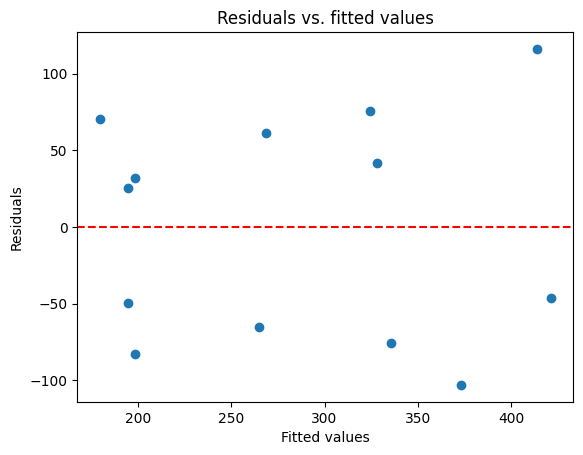

In [15]:
# Get the residuals and fitted values
residuals = results_statsmodels.resid
fitted_values = results_statsmodels.fittedvalues

# Residuals vs. fitted values plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. fitted values")
plt.show()

This plot is similar to the `sns.residplot` we used in the previous chapter, as both visualize the residuals against the fitted values. However, we're now creating the plot manually using Matplotlib to demonstrate how to access and work with the residuals directly from the Statsmodels results.


#### Histograms

In addition to plotting the residuals against the predicted values, we can also examine the *distribution of the residuals* using a histogram. This can provide insights into whether the residuals are approximately normally distributed, which is one of the key assumptions of linear regression.

If the model's assumptions hold, we expect the histogram of residuals to resemble a bell-shaped curve, indicating a normal distribution. However, if the histogram shows significant skewness (asymmetry) or kurtosis (peakedness or flatness), it might suggest deviations from normality. For example, if the histogram of residuals is heavily skewed to the right, it indicates that the model tends to underpredict the response variable more often than it overpredicts it. This could suggest a need for transformations or a different modeling approach.

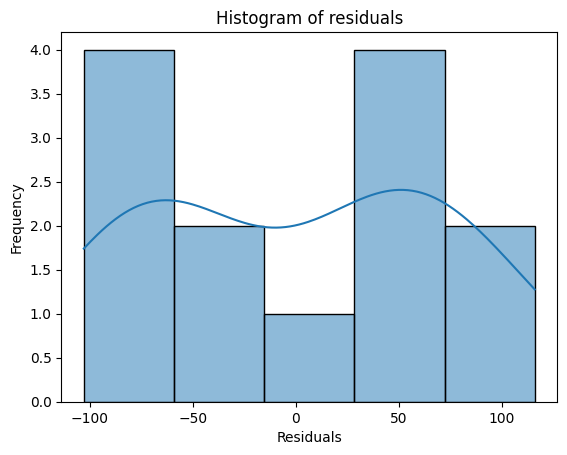

In [16]:
import seaborn as sns

# Histogram of residuals
sns.histplot(residuals, kde=True)  # Add a kernel density estimate for smoother visualization
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals");

#### Q-Q plots

While histograms provide a general visual impression of the distribution of residuals, **quantile-quantile (Q-Q) plots** offer a more precise way to assess whether the residuals follow a normal distribution.

As we have already seen in a previous chapter on normality and outlier detection, a Q-Q plot compares the quantiles of the residuals to the quantiles of a standard normal distribution. The Q-Q plot plots the quantiles of the residuals on the y-axis against the corresponding quantiles of the *standard normal distribution* on the x-axis.

If the residuals are normally distributed, the points on the Q-Q plot will fall approximately along a straight diagonal line. But deviations from the straight line indicate departures from normality, in particular:

- S-shaped curve suggests that the residuals have heavier tails than a normal distribution (more extreme values)
- U-shaped curve indicates lighter tails than a normal distribution (fewer extreme values)
- Points above the line indicate that the residuals are skewed to the right (positive skew)
- Points below the line indicate that the residuals are skewed to the left (negative skew)

For example, if the points on the Q-Q plot deviate substantially from the straight line at both ends, it suggests that the residuals have heavier tails than a normal distribution. This might indicate the presence of outliers or a distribution with more extreme values than expected in a normal distribution.

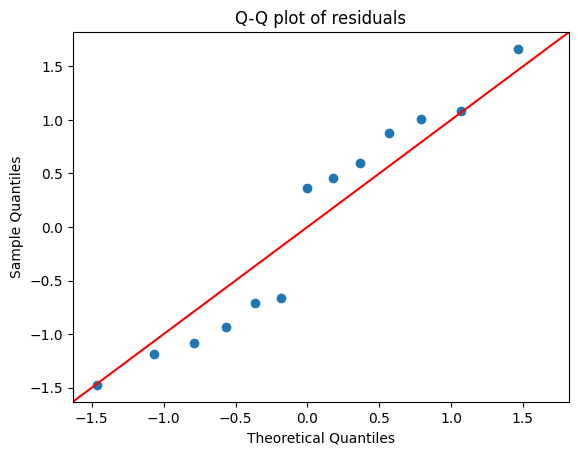

In [17]:
from statsmodels.api import qqplot

# Q-Q plot of residuals
qqplot(residuals, fit=True, line='45')  # Assess whether the residuals follow a normal distribution
plt.title("Q-Q plot of residuals");

While we've used Statsmodels to create the Q-Q plot here, remember that we can also utilize other libraries or even implement it manually, as we explored in a previous chapter. Both SciPy and Pingouin offer functions for generating Q-Q plots, each with its own set of customization options.

#### Scale-location plot

The scale-location plot, also known as the *spread-location plot*, is another useful visualization for assessing the assumption of homoscedasticity. This plot helps us determine if the residuals are spread equally along the ranges of predictors.

Ideally, we want to see a horizontal line with equally (randomly) spread points in the scale-location plot. This indicates that the variability of the residuals is roughly constant across the range of predicted values, supporting the assumption of homoscedasticity.

However, if we observe a pattern where the spread of the residuals increases or decreases systematically with the predicted values, e.g., a funnel shape, it suggests heteroscedasticity. This means that the variability of the errors is not constant, which can violate the assumptions of linear regression and affect the reliability of our inferences.

For example, if the scale-location plot shows an upward trend, it suggests that the variability of the residuals increases as the predicted values increase. This might indicate that our model is less accurate for predicting higher values of the response variable.

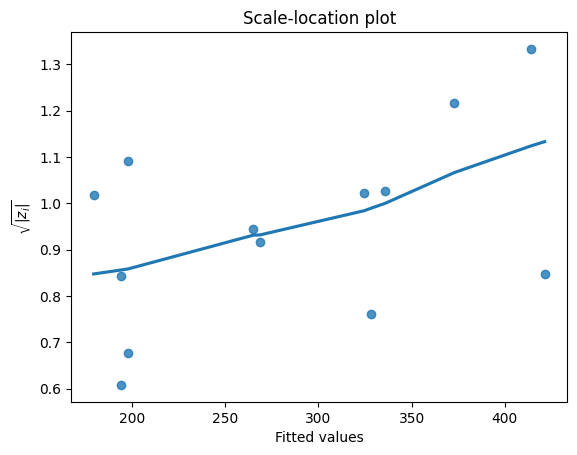

In [91]:
# Retrieve a specific type of residual that is more robust for identifying outliers, more info oon the link below
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.get_resid_studentized_external.html
model_norm_residuals = results_statsmodels.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(
    x=fitted_values,
    y=model_norm_residuals_abs_sqrt,
    ci=None,
    lowess=True)
plt.title("Scale-location plot")
plt.xlabel("Fitted values")
plt.ylabel(r"$\sqrt{|z_i|}$")
plt.show()

### Diagnostic tests

#### Statsmodels diagnostic table

In addition to visual diagnostics, Statsmodels provides a convenient table in the summary output that includes several statistical tests. These tests can offer further insights into the validity of our model's assumptions and help us identify potential issues.

In [19]:
# Get the diagnostic table
diag_table_statsmodels = results_statsmodels.summary().tables[2]

# Print the coefficients table
print(diag_table_statsmodels)

Omnibus:                        3.503   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.139
Skew:                           0.023   Prob(JB):                        0.566
Kurtosis:                       1.550   Cond. No.                         192.


What does this table show:

- 'Omnibus': this test assesses the normality of the residuals. It combines measures of skewness and kurtosis to provide an overall test of whether the residuals deviate significantly from a normal distribution.
- 'Prob(Omnibus)': this is the P value associated with the Omnibus test. A low P value suggests that the residuals are not normally distributed, which could indicate a problem with the model's assumptions.
- 'Durbin-Watson': this statistic tests for autocorrelation in the residuals. Autocorrelation occurs when the residuals are not independent of each other, which can violate the assumption of independence. A Durbin-Watson statistic around 2 suggests no autocorrelation, while values significantly less than 2 suggest positive autocorrelation.
- 'Jarque-Bera (JB)': this test also assesses the normality of the residuals by examining their skewness and kurtosis.  A high p-value suggests that the residuals are normally distributed.
- 'Prob(JB)': this is the p-value associated with the Jarque-Bera test.
- 'Skew': this statistic measures the asymmetry of the distribution of the residuals. A skewness of 0 indicates a perfectly symmetrical distribution, while positive values indicate right skewness and negative values indicate left skewness.
- 'Kurtosis': this statistic measures the "peakedness" of the distribution of the residuals. A kurtosis of 3 indicates a normal distribution, while higher values indicate a more peaked distribution and lower values indicate a flatter distribution.
- 'Cond. No.': this is the condition number, which measures the sensitivity of the model to small changes in the data. A high condition number can indicate multicollinearity (high correlation between predictors), which is more relevant in multiple regression.

By examining these diagnostic tests, we can gain further insights into the adequacy of our model and potential areas for improvement. If any of these tests suggest significant deviations from the assumptions, we might need to consider transformations, different modeling approaches, or further investigation of the data.

#### Breusch-Pagan

In addition to examining the scale-location plot, we can use the Breusch-Pagan test to formally test for heteroscedasticity. This statistical test assesses whether the variance of the errors is related to the predictor variables. While not directly shown in the statsmodels summary output, [we can perform this test separately using the Statsmodels library](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html).

The `het_breuschpagan` function returns a tuple containing the Lagrange multiplier test statistic, the P value associated with the test statistic, the F-statistic for the auxiliary regression, and the P value associated with the F-statistic.

In [63]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
breusch_pagan_test = het_breuschpagan(
    results_statsmodels.resid,
    results_statsmodels.model.exog  # Provides the design matrix (exogenous variables) used in the model
)

# Print the test results
print("Breusch-Pagan test results:", breusch_pagan_test)
print(f"P value: {breusch_pagan_test[-1]:.5f}")

Breusch-Pagan test results: (3.1971404515605957, 0.07376714520088247, 3.5875802150776823, 0.08479389740119875)
P value: 0.08479


The P value associated with the F-statistic is higher than 0.05, meaning we do not have enough evidence to reject the null hypothesis of homoscedasticity. In simpler terms, it suggests that the variability of the residuals is constant across the range of predictor values. This supports the assumption of homoscedasticity.

#### Exogeneity

Recall our simple linear regression equation $y = f(x) + \epsilon$. The **exogeneity** assumption states that the predictor variable ($x$) should not be correlated with the error term ($\epsilon$). In other words, the factors that influence the error term should be independent of the factors that influence the predictor variable.

Exogeneity is crucial because the residuals we analyze are estimates of the error term. If the predictor variable is correlated with the error term, the *residuals will also exhibit a systematic relationship with the predictor*, potentially leading to misleading patterns in the residual plots.

Unfortunately, there's no single statistical test to definitively assess exogeneity. It often requires careful consideration of the relationship between the variables and potential sources of endogeneity (violation of exogeneity), such as omitted variables or measurement error.

However, by examining residual plots and considering the context of our analysis, we can gain some insights into the plausibility of the exogeneity assumption. If the residuals show a clear non-random pattern related to the predictor variable, it might suggest a violation of exogeneity.

#### Other diagnostic tools

While we've focused on visual diagnostics and the Statsmodels diagnostic table in this chapter, other tools can provide further insights into our regression model.

Recall from the chapter on normality and outlier detection that **leverage** measures how far an observation's predictor values are from the others, while **influence** measures how much an observation affects the regression results. One common measure of influence is **Cook's distance**, which we explored in detail previously.

Statsmodels provides ways to calculate these measures, allowing us to identify influential data points that might warrant further investigation.

In [59]:
# Get the influence summary frame from the fitted model result object
influence_summary = results_statsmodels.get_influence().summary_frame()

# Print the first few rows
influence_summary.head()

,dfb_Intercept,dfb_per_C2022_fatacids,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.432524,-0.399939,0.130740,1.036203,0.195836,0.511351,1.040043,0.513246
1,0.125778,-0.114766,0.013442,0.369589,0.164447,0.163963,0.354598,0.157312
2,-0.246360,0.224792,0.049815,-0.711492,0.164447,-0.315643,-0.694551,-0.308127
3,-0.414219,0.376444,0.132773,-1.192503,0.157350,-0.515311,-1.218495,-0.526542
4,0.149938,-0.136264,0.019598,0.458159,0.157350,0.197982,0.441066,0.190596


### Consequences and remedies

Why are these assumptions important and what we can do if they are violated?

Violating the assumptions of linear regression can have several consequences:

- Biased coefficient estimates: if the linearity or exogeneity assumptions are violated, the estimated regression coefficients might be biased, meaning they don't accurately reflect the true relationships between the variables.
- Invalid inference: if the homoscedasticity or normality assumptions are violated, the standard errors, confidence intervals, and P values might be inaccurate, leading to incorrect conclusions about the statistical significance of the relationships.
- Inefficient estimates: even if the coefficients are unbiased, violating assumptions can lead to less efficient estimates, meaning they have larger standard errors and are less precise.
- Poor predictive accuracy: violations of assumptions can also affect the model's ability to accurately predict new observations.

Fortunately, we have several tools to address violations of assumptions:

- Transformations: transforming the predictor or response variable (e.g., taking the logarithm, square root, or reciprocal) can often help address non-linearity or heteroscedasticity.
- Weighted least squares: if we detect heteroscedasticity, where the variability of the errors is not constant, we can use **weighted least squares (WLS)** regression. This method assigns different weights to the observations, giving more weight to those with smaller variances and less weight to those with larger variances. This can help to account for the unequal variances and improve the efficiency of the estimates. 
  In WLS, the function we minimize, previously denoted as $S(\boldsymbol{\beta})$, is modified to incorporate weights:
  $$S(\boldsymbol{\beta}) = \sum_{i=1}^{n} w_i [y_i - f(\mathbf{x}_i, \boldsymbol{\beta})]^2$$
  where $w_i$ represents the weight assigned to the $i$-th observation.
- If, in addition to heteroscedasticity, there is also correlation between the error terms (**autocorrelation**), then **generalized least squares (GLS)** models can be used. These models are more complex but can account for both unequal variances and correlations in the errors.
- Robust regression: if outliers are a concern, we can use robust regression techniques that are less sensitive to extreme values.
- Non-linear models: if the relationship between the variables is clearly non-linear, we might need to consider non-linear regression models.

Understanding the consequences of violating assumptions and the available remedies empowers us to take appropriate action and ensure the validity and reliability of our linear regression analysis. By addressing potential issues, we can build more accurate and robust models that provide meaningful insights into the relationships between variables.

## Statistical inference and uncertainty

In the previous sections, we explored how to estimate the coefficients of a linear regression model and assess its overall fit. Now, we'll delve into the realm of inference and uncertainty. This involves quantifying the **uncertainty** associated with our estimates and drawing conclusions about the **population** based on our sample data.

### Standard error of the regression

A key measure of uncertainty in linear regression is the **standard error of the regression (SER)**, also known as the *standard error of the estimate ($S$)*. SER represents the average distance that the observed values fall from the regression line:

$$S = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - 2}} = \sqrt{\frac{\text{RSS}}{n-2}}$$

where:

- $y_i$ is the observed value for the $i$-th observation
- $\hat{y}_i$ is the predicted value for the $i$-th observation
- $n$ is the number of observations
- $\text{RSS}$ is the residual sum of squares

Notice that we divide by $n - 2$ in the formula, which is the **degrees of freedom of the residuals**. This is because we've estimated two parameters in the *simple linear regression* model: the intercept ($\beta_0$) and the slope ($\beta_1$). Estimating these parameters consumes two degrees of freedom from the data.

In [60]:
# Calculate S (SER)
ser = np.sqrt(rss / df_residuals)
# np.sqrt(results_statsmodels.mse_resid)

print(f"S = {ser:.4f}")

S = 75.8955


SER provides a valuable measure of the *overall accuracy* of our model. It tells us *how much the observed values deviate from the regression line, on averag*e, in the same units as the response variable.

Here's why SER is important and how we can use it:

- Assess the accuracy of the model: a lower SER generally indicates a better fit, where the observations are closer to the regression line. We can use SER to compare the accuracy of different models (we will discuss this topic in the next chapter about the comparison of models).
- Visualize the uncertainty of the regression line: SER is a key component in calculating *confidence bands around the regression line*. These bands provide a visual representation of the uncertainty associated with the estimated relationship between the variables, as we will see later.
- Quantify the uncertainty in our predictions: SER helps us understand how much our predictions might deviate from the actual values, on average. This is crucial for constructing prediction intervals, which we'll discuss later in the chapter.
- Identify potential outliers: we can use SER to calculate standardized residuals, which can help identify potential outliers.
- Understand the overall fit: while R² provides a relative measure of the goodness of fit (the proportion of variance explained), SER provides an absolute measure of the variability around the regression line. Considering both metrics gives us a more complete picture of the model's performance.

### P values and confidence intervals

The Statsmodels output provides standard errors, t-statistics, P values and confidence intervals for each coefficient in the model. These statistics help us quantify the uncertainty associated with the estimated relationships between the predictors and the response variable.

Remind that a confidence interval provides a range of plausible values for the true **population** value of a coefficient. For example, a 95% confidence interval for the slope tells us that we can be 95% confident that the true slope of the relationship between the predictor and the response falls within that interval.

A P value tests the *null hypothesis* that the true coefficient is *zero*. A low P value (typically below 0.05) suggests that the predictor variable has a statistically significant effect on the response variable, meaning that the observed relationship is unlikely to be due to chance alone.

These statistics are essential for drawing meaningful conclusions from our regression analysis. They help us understand not only the magnitude and direction of the relationships but also the level of confidence we can have in our estimates.

In [23]:
# Print the coefficients table
print(coef_table_statsmodels)

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -486.5420    193.716     -2.512      0.029    -912.908     -60.176
per_C2022_fatacids    37.2077      9.296      4.003      0.002      16.748      57.668


#### T-tests for the coefficients

Just as we used a t-test to assess the significance of the correlation coefficient, we can also use a t-test to evaluate the significance of each coefficient in our linear regression model. The formula for the t-statistic is similar, involving the ratio of the estimated coefficient to its standard error. However, in the context of regression, the t-test helps us determine whether a predictor variable has a statistically significant effect on the response variable:

$$t = \frac{\hat{\beta}_j}{s_{\hat{\beta}_j}}$$

where $t$ is the t-statistic, $\hat{\beta}_j$ is the estimated coefficient for the $j$-th predictor variable, and $s_{\hat{\beta}_j}$ is the standard error of the estimated coefficient.

The standard error of a coefficient measures the variability or uncertainty associated with the estimated coefficient. It can be calculated using the following general formula:

$$s_{\hat{\beta}_j} = \sqrt{s^2 [(\mathbf{X}^T \mathbf{X})^{-1}]_{j,j}}$$

where $s^2$ is the estimated variance of the error term, i.e., the square of SER ($S^2$), and $[(\mathbf{X}^T \mathbf{X})^{-1}]_{j,j}$ is the $j$-th diagonal element of the inverted $\mathbf{X}^T \mathbf{X}$ matrix, which represents the variance of the $j$-th coefficient estimate.

This leads to the following formula:

$$
s_{\hat{β}_0} = S \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{\sum(x_i - \bar{x})^2}}
\qquad
s_{\hat{β}_1} = S \sqrt{\frac{1}{\sum(x_i - \bar{x})^2}} 
$$

While we won't delve into the calculation of these standard errors, it's important to understand that they are derived from the overall variability of the data and the specific structure of the model. Fortunately, Statsmodels provides the standard errors directly in its output, so we can readily access them without performing the calculations ourselves.

In [64]:
# Extract the coefficients and standard errors from the statsmodels table
intercept_coef = results_statsmodels.params["Intercept"]
intercept_stderr = results_statsmodels.bse["Intercept"]  # bse contains the standard errors
slope_coef = results_statsmodels.params["per_C2022_fatacids"]
slope_stderr = results_statsmodels.bse["per_C2022_fatacids"]

# Calculate the t-ratios
t_intercept = intercept_coef / intercept_stderr
t_slope = slope_coef / slope_stderr

# Print the t-ratios
print(f"t-ratio for Intercept: {t_intercept:.3f}")
print(f"t-ratio for Slope: {t_slope:.3f}")

t-ratio for Intercept: -2.512
t-ratio for Slope: 4.003


With the t-statistics and degrees of freedom in hand, we can now determine the P value for the correlation. We'll use the cumulative distribution function (CDF) of the **t-distribution** to calculate this P value.

In [92]:
from scipy.stats import t as t_dist

# Calculate the P values (two-sided test)
intercept_pvalue = 2 * (1 - t_dist.cdf(abs(t_intercept), df_residuals))
slope_pvalue = 2 * (1 - t_dist.cdf(abs(t_slope), df_residuals))

# Print the P values
print(f"P value for Intercept: {intercept_pvalue:.5f}")
print(f"P value for Slope: {slope_pvalue:.5f}")

P value for Intercept: 0.02890
P value for Slope: 0.00208


#### Visualizing t, critical and P values

As we've done in previous chapters, we can visualize how the P value and critical values are determined using the t-statistic and the t-distribution. This visualization helps us understand the relationship between the calculated t-statistic, the degrees of freedom, and the corresponding P value, providing a clearer picture of the hypothesis testing process.

Notice that the critical t-value (t*) is the same for both coefficients. This is because in simple linear regression, both coefficients share the same degrees of freedom (n - 2), which determine the shape of the t-distribution.

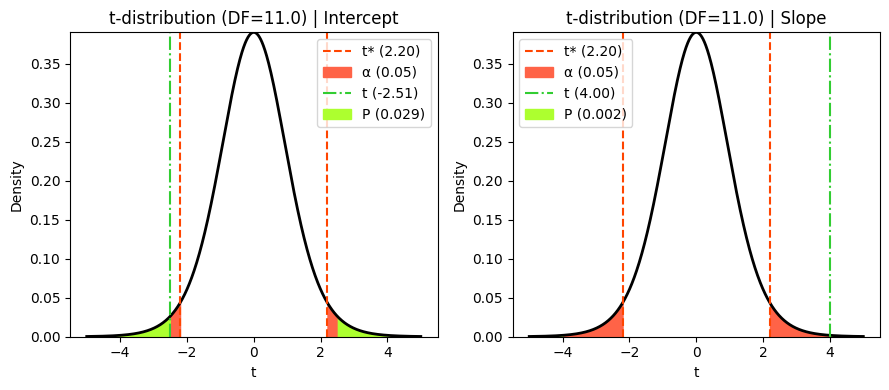

In [66]:
# Extract the t-values for the coefficients
intercept_tvalue = results_statsmodels.tvalues['Intercept']  # Extract from the table
slope_tvalue = results_statsmodels.tvalues["per_C2022_fatacids"]

# Significance level (alpha)
α = 0.05

# Calculate critical t-values (two-tailed test)
t_crit = t_dist.ppf(1 - α/2, df_residuals)

# Generate x values for plotting
x_t = np.linspace(-5, 5, 1000)
hx_t = t_dist.pdf(x_t, df_residuals)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Plot for Intercept
axes[0].plot(
    x_t,
    hx_t,
    lw=2,
    color='black')

# Critical value
axes[0].axvline(
    x=-t_crit,
    color='orangered',
    linestyle='--')
axes[0].axvline(
    x=t_crit,
    color='orangered',
    linestyle='--',
    label=f"t* ({t_crit:.2f})")

# Alpha area
axes[0].fill_between(
    x_t[x_t <= -t_crit],
    hx_t[x_t <= -t_crit],
    color='tomato',
    label=f"α ({α})")
axes[0].fill_between(
    x_t[x_t >= t_crit],
    hx_t[x_t >= t_crit],
    color='tomato')

# t-statistic
axes[0].axvline(
    x=intercept_tvalue,
    color='limegreen',
    linestyle='-.',
    label=f"t ({intercept_tvalue:.2f})")

# P value area
axes[0].fill_between(
    x_t[x_t <= -abs(t_intercept)],
    hx_t[x_t <= -abs(t_intercept)],
    color='greenyellow',
    label=f"P ({intercept_pvalue:.3f})")
axes[0].fill_between(
    x_t[x_t >= abs(t_intercept)],
    hx_t[x_t >= abs(t_intercept)],
    color='greenyellow')

axes[0].set_xlabel("t")
axes[0].set_ylabel('Density')
axes[0].set_title(
    f"t-distribution (DF={df_residuals}) | Intercept")
axes[0].margins(x=0.05, y=0)
axes[0].legend()


# Plot for Slope
axes[1].plot(x_t, hx_t, lw=2, color='black')
axes[1].axvline(
    x=-t_crit, color='orangered', linestyle='--')
axes[1].axvline(
    x=t_crit, color='orangered', linestyle='--',
    label=f"t* ({t_crit:.2f})")
axes[1].fill_between(
    x_t[x_t <= -t_crit], hx_t[x_t <= -t_crit], color='tomato',
    label=f"α ({α})")
axes[1].fill_between(
    x_t[x_t >= t_crit], hx_t[x_t >= t_crit], color='tomato')
axes[1].axvline(
    x=slope_tvalue, color='limegreen', linestyle='-.',
    label=f"t ({slope_tvalue:.2f})")
axes[1].fill_between(
    x_t[x_t <= -abs(t_slope)], hx_t[x_t <= -abs(t_slope)], color='greenyellow',
    label=f"P ({slope_pvalue:.3f})")
axes[1].fill_between(
    x_t[x_t >= abs(t_slope)], hx_t[x_t >= abs(t_slope)], color='greenyellow')
axes[1].set_xlabel("t")
axes[1].set_ylabel('Density')
axes[1].set_title(f"t-distribution (DF={df_residuals}) | Slope")
axes[1].legend()

axes[1].margins(x=0.05, y=0)
plt.tight_layout();

#### Confidence interval

To calculate the confidence interval, we need to consider the variability of the estimated coefficient, which is captured by its standard error. Here's how it's done:

1. Calculate the point estimate: this is the value of the estimated coefficient $\hat{\beta}_j$ obtained from the regression analysis.
2. Calculate the standard error: the standard error of the coefficient $s_{\hat \beta_j}$ is a measure of its variability.
3. Determine the degrees of freedom: the degrees of freedom for the t-distribution used in constructing the confidence interval are $n - 2$ in simple linear regression, where $n$ is the number of observations.
4. Find the critical t-value: using the desired confidence level (e.g., 95%) and the calculated degrees of freedom, we can find the corresponding critical t-value ($t^\ast$) from the t-distribution table or using statistical software.
5. Calculate the margin of error: multiply the standard error by the critical t-value: $W_j = t^\ast \times s_{\hat \beta_j}$.
6. Construct the confidence interval: subtract and add the margin of error to the point estimate to obtain the lower and upper bounds of the confidence interval: $\mathrm{CI}_{\beta_j} = \hat{\beta}_j \pm W_j$

In [27]:
# Calculate the confidence interval (e.g., 95% confidence)
confidence_level = 0.95
margin_of_error_intercept = t_crit * intercept_stderr
ci_intercept = (
    intercept_coef - margin_of_error_intercept,
    intercept_coef + margin_of_error_intercept)
margin_of_error_slope = t_crit * slope_stderr
ci_slope = (
    slope_coef - margin_of_error_slope,
    slope_coef + margin_of_error_slope)

# Print the results
print(f"95% confidence interval for the Intercept: \
[{ci_intercept[0]:.3f}, {ci_intercept[1]:.3f}]")
print(f"95% confidence interval for the Slope: \
[{ci_slope[0]:.3f}, {ci_slope[1]:.3f}]")

95% confidence interval for the Intercept: [-912.908, -60.176]
95% confidence interval for the Slope: [16.748, 57.668]


### Visualizing the confidence band

Recall that the SER (S) measures the overall variability of the observed values around the regression line. We can use this measure, together with the critical t-value for the desired confidence level, e.g., 95%, to construct a **confidence band** around the line. The `plot_ci_manual()` function  calculates the margin of error for a confidence interval around the *predicted mean response* at a *specific value of the predictor variable* $x_0$, as we predict $\hat y_0 = \hat \beta_0 + \hat \beta_1 x_0$. The following formula is derived from the standard error of the predicted mean, taking into account both the uncertainty in the estimated coefficients and the variability of the data around the regression line:

$$\text{CI}(x_0) = \hat y_0 \pm t^\ast \times S \times \sqrt{\frac{1}{n} + \frac{(x_0 - \bar x)^2}{\sum(x_i - \bar x)^2}}$$

As we can see, a larger SER will result in a wider confidence band, reflecting greater uncertainty in the estimated relationship.

To further illustrate the concept of confidence intervals and their role in quantifying uncertainty, let's visualize the confidence band around our regression line. This visualization will provide a clear and intuitive representation of the range of plausible values for the true relationship between the variables.

We can define a `plot_ci_manual()` function to calculate and plot the 95% confidence ('ci') band around the regression line obtained using `np.polyfit()`.

In [28]:
def plot_ci_manual(t, ser, n, x, x0, y0, ax=None):
    """Return an axes of confidence bands using a simple approach."""

    if ax is None:
        ax = plt.gca()

    ci = t * ser * np.sqrt(1/n + (x0 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x0, y0 + ci, y0 - ci, color='salmon', zorder=0)
    
    return ax

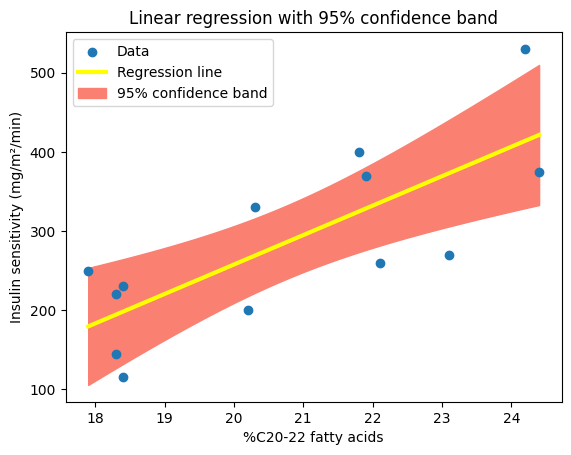

In [29]:
import matplotlib.patches as mpatches

# Plot the data and the fitted line
plt.scatter(X, y, label="Data")
plt.plot(
    X,
    slope_numpy * X + intercept_numpy,
    color="yellow", lw=3,
    label="Regression line")

# Calculate and plot the CIs using the previous values for t*, S, n and X
x0 = np.linspace(np.min(X), np.max(X), 100)
y0 = slope_numpy * x0 + intercept_numpy  # Calculate predicted values for x0
plot_ci_manual(t_crit, ser, n, X, x0, y0)  # Plot CI on the current axes

# Create a custom legend handle for the confidence band
confidence_band_patch = mpatches.Patch(color='salmon', label='95% confidence band')

plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Linear regression with 95% confidence band")

# Get the handles and labels from the automatically generated legend
handles, labels = plt.gca().get_legend_handles_labels()
# Add the confidence band patch to the handles list
handles.append(confidence_band_patch)
# Add the legend to the plot, including all labels
plt.legend(handles=handles);

We can achieve a similar visualization [using our fitted model and its `get_prediction` method](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.get_prediction.html). By leveraging its built-in capabilities, we can generate the fitted values and confidence intervals directly, using the 'mean_ci_lower' and 'mean_ci_upper' values from the prediction results. This streamlined approach eliminates the need for a custom function and showcases the convenience of Statsmodels for visualizing uncertainty in regression analysis. However, the resulting confidence band might appear less smooth compared to the one generated with a denser set of points from `np.linspace`, because it uses only the x-values from the original dataset.

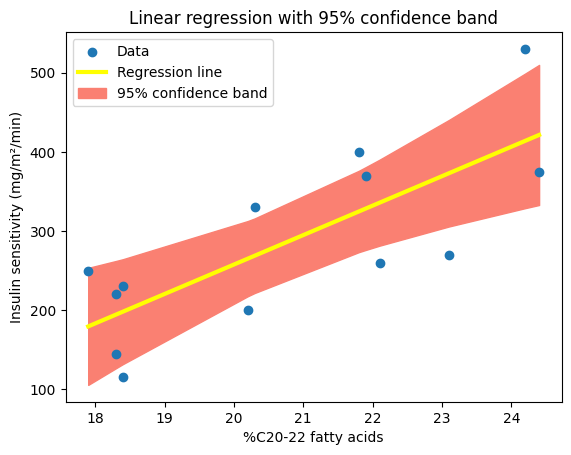

In [67]:
# Plot the data and the fitted line (Statsmodels)
plt.scatter(X, y, label="Data")
plt.plot(
    X,
    results_statsmodels.fittedvalues,
    color="yellow",
    lw=3,
    label="Regression line")

# Extract confidence intervals from Statsmodels predictions
predictions = results_statsmodels.get_prediction(X)
prediction_summary_frame = predictions.summary_frame(alpha=0.05)

# Plot the confidence intervals
plt.fill_between(
    x=X,
    y1=prediction_summary_frame['mean_ci_lower'],
    y2=prediction_summary_frame['mean_ci_upper'],
    color='salmon',
    zorder=0)

# Create a custom legend handle for the confidence band
confidence_band_patch = mpatches.Patch(
    color='salmon', label='95% confidence band')

plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Linear regression with 95% confidence band")

# Get the handles and labels from the automatically generated legend
handles, labels = plt.gca().get_legend_handles_labels()
# Add the confidence band patch to the handles list
handles.append(confidence_band_patch)
# Add the legend to the plot, including all labels
plt.legend(handles=handles);

### Bootstrapping in linear regression

As we saw in the correlation chapter, bootstrapping is a powerful technique for statistical inference, especially when dealing with small sample sizes or when the assumptions of traditional methods might not be fully met. It allows us to estimate parameters and confidence intervals directly from the data without relying on strong distributional assumptions.

In the context of linear regression, we can use bootstrapping to:

- Estimate the sampling distribution of the coefficients: by repeatedly resampling the data and fitting the regression model, we can approximate the distribution of the estimated coefficients.
- Calculate confidence intervals: we can use the bootstrap distribution to construct confidence intervals for the coefficients, providing a range of plausible values.
- Visualize confidence bands: we can use bootstrapping to create confidence bands around the regression line, which provide a visual representation of the uncertainty in the estimated relationship between the variables.
- Perform hypothesis tests: we can use the bootstrap distribution to calculate p-values and test hypotheses about the coefficients.

#### Generating bootstrap samples

Just as we did for correlation analysis, the core idea behind bootstrapping in linear regression is to treat our observed sample of paired data points (predictor and response values) as a miniature representation of the population. We resample these pairs *with replacement*, preserving the relationship between the predictor and response within each pair.

This involves creating many bootstrap samples by repeatedly resampling the original data with replacement. For each bootstrap sample, we fit the linear regression model and obtain the estimated coefficients. This process generates a collection of bootstrap estimates that we can use for inference.

Here's a step-by-step breakdown of the bootstrapping procedure:

1. Resample the data: randomly sample the data points, i.e. **pairs of predictor AND response values**, with replacement to create a bootstrap sample. The bootstrap sample should have the same size as the original dataset.
2. Fit the model: fit the linear regression model to the bootstrap sample and obtain the estimated coefficients.
3. Repeat: repeat steps 1 and 2 many times (e.g., 1000 or more) to create a collection of bootstrap estimates for the coefficients.
4. Analyze the bootstrap distribution: use the distribution of the bootstrap estimates to calculate confidence intervals, p-values, or other inferential statistics.

In [31]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression and return coefficients."""

    inds = np.arange(len(x))
    bs_intercept_reps = np.empty(size)
    bs_slope_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds), replace=True)
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        # Fit the linear regression model
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_intercept_reps, bs_slope_reps

In [32]:
# Set random seed for reproducibility
np.random.seed(111)

# Set the number of replicates
B = 10_000

# Generate bootstrap replicates of the intercept and slope
bs_intercept_reps, bs_slope_reps = draw_bs_pairs_linreg(X, y, size=B)

# Print the 10 first replicates for the intercept and slope
print("Intercept replicates:", bs_intercept_reps[:5])
print("Slope replicates:", bs_slope_reps[:5])

Intercept replicates: [-444.98247966 -296.53975671 -566.17720503 -649.81442009 -546.64129263]
Slope replicates: [34.98583138 27.91417119 41.08623919 45.74051836 42.48376325]


Without a custom function, we can also implement a more "pythonic" snippet that leads to the same results.

In [33]:
# Set random seed for reproducibility
np.random.seed(111)

# Set the number of replicates
B = 10_000

# Generate bootstrap replicates of the intercept and slope (more Pythonic)
bs_slope_reps, bs_intercept_reps = np.array([
    np.polyfit(X[bs_inds], y[bs_inds], 1)
    for bs_inds in np.random.choice(
        np.arange(len(X)), size=(B, len(X)), replace=True)
]).T  # Transpose to separate intercepts and slopes

# Print the 10 first replicates for the intercept and slope
print("Intercept (β0) replicates:", bs_intercept_reps[:5])
print("Slope (β1) replicates:", bs_slope_reps[:5])

Intercept (β0) replicates: [-444.98247966 -296.53975671 -566.17720503 -649.81442009 -546.64129263]
Slope (β1) replicates: [34.98583138 27.91417119 41.08623919 45.74051836 42.48376325]


#### Constructing confidence intervals from bootstrap replicates

Now that we have generated a collection of bootstrap replicates for the intercept and slope, we can use them to construct confidence intervals. These intervals provide a range of plausible values for the true population values of the coefficients.

To estimate the confidence interval, we'll use the percentiles of the bootstrap distribution. For example, to construct a 95% confidence interval, we'll use the 2.5th and 97.5th percentiles of the bootstrap replicates. This means that 95% of the bootstrapped coefficients fall within this interval, providing a range of plausible values for the true population coefficients.

In [95]:
# Calculate the means, SEs, and 95% confidence intervals
bs_intercept_m = np.mean(bs_intercept_reps)
bs_slope_m = np.mean(bs_slope_reps)

bs_intercept_s = np.std(bs_intercept_reps, ddof=1)
bs_slope_s = np.std(bs_slope_reps, ddof=1)

bs_intercept_ci = np.round(np.percentile(bs_intercept_reps, [2.5, 97.5]), 3)
bs_slope_ci = np.round(np.percentile(bs_slope_reps, [2.5, 97.5]), 3)

# Print the results
print(f"Bootstrap mean (β0) = {bs_intercept_m:.5f}")
print(f"Bootstrap mean (β1) = {bs_slope_m:.5f}")
print("---")
print(f"Bootstrap SE (β0) = {bs_intercept_s:.5f}")
print(f"Bootstrap SE (β1) = {bs_slope_s:.5f}")
print("---")
print(f"Bootstrap {confidence_level*100:.0f}% CI (β0) = {bs_intercept_ci}")
print(f"Bootstrap {confidence_level*100:.0f}% CI (β1) = {bs_slope_ci}")

Bootstrap mean (β0) = -487.47498
Bootstrap mean (β1) = 37.22945
---
Bootstrap SE (β0) = 199.24043
Bootstrap SE (β1) = 9.89711
---
Bootstrap 95% CI (β0) = [-887.886 -113.057]
Bootstrap 95% CI (β1) = [18.705 57.088]


We're observing a common phenomenon when comparing confidence intervals obtained from traditional methods (like those in Statsmodels) and those calculated using bootstrapping. While both methods aim to quantify the uncertainty around the estimated coefficients, they can produce slightly different results due to their underlying approaches.

Traditional confidence intervals in Statsmodels are based on the assumption that the errors are normally distributed. If this assumption is not perfectly met, the calculated intervals might not be entirely accurate. Bootstrapping, on the other hand, is a non-parametric method that doesn't rely on this assumption. It estimates the sampling distribution of the coefficients directly from the data.

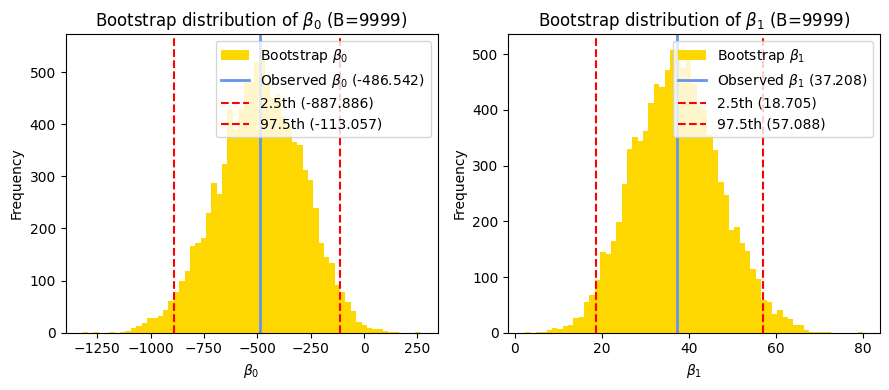

In [68]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Histogram bootstrap distribution for Intercept
axes[0].hist(
    bs_intercept_reps,
    density=False, bins='auto',
    color='gold',
    label=r'Bootstrap $\beta_0$')
axes[0].axvline(
    x=intercept_coef,
    color='cornflowerblue', linestyle='-', lw=2,
    label=fr'Observed $\beta_0$ ({intercept_coef:.3f})')
axes[0].axvline(
    x=bs_intercept_ci[0],
    color='red', linestyle='--',
    label=f'2.5th ({bs_intercept_ci[0]:.3f})')
axes[0].axvline(
    x=bs_intercept_ci[1],
    color='red', linestyle='--',
    label=f'97.5th ({bs_intercept_ci[1]:.3f})')
axes[0].set_xlabel(r"$\beta_0$")
axes[0].set_ylabel('Frequency')
axes[0].set_title(fr"Bootstrap distribution of $\beta_0$ (B={B})")
axes[0].legend()

# Histogram bootstrap distribution for Intercept
axes[1].hist(
    bs_slope_reps,
    density=False, bins='auto',
    color='gold',
    label=r'Bootstrap $\beta_1$')
axes[1].axvline(
    x=slope_coef,
    color='cornflowerblue', linestyle='-', lw=2,
    label=fr'Observed $\beta_1$ ({slope_coef:.3f})')
axes[1].axvline(
    x=bs_slope_ci[0],
    color='red', linestyle='--',
    label=f'2.5th ({bs_slope_ci[0]:.3f})')
axes[1].axvline(
    x=bs_slope_ci[1],
    color='red', linestyle='--',
    label=f'97.5th ({bs_slope_ci[1]:.3f})')

axes[1].set_xlabel(r"$\beta_1$")
axes[1].set_ylabel('Frequency')
axes[1].set_title(fr"Bootstrap distribution of $\beta_1$ (B={B})")
axes[1].legend()

plt.tight_layout();

As seen in the previous chapters, given the symmetrical distribution of our bootstrapped coefficients, we can also estimate the confidence intervals of the bootstrap distributions using the normal approximation and the bootstrap means and standard errors.

In [69]:
from scipy.stats import norm

# Calculate the 95% normal margin of error
z_crit = norm.ppf((1 + confidence_level)/2)
bs_intercept_w =  z_crit * bs_intercept_s
bs_slope_w =  z_crit * bs_slope_s

# Calculate normal confidence interval
bs_intercept_ci_normal = np.round(
    (bs_intercept_m - bs_intercept_w, bs_intercept_m + bs_intercept_w), 5)
bs_slope_ci_normal = np.round(
    (bs_slope_m - bs_slope_w, bs_slope_m + bs_slope_w), 5)

# Print the result
print(f"95% normal CI of bootstrap distribution (β0) = {bs_intercept_ci_normal}")
print(f"95% normal CI of bootstrap distribution (β1) = {bs_slope_ci_normal}")

95% normal CI of bootstrap distribution (β0) = [-877.97905  -96.97092]
95% normal CI of bootstrap distribution (β1) = [17.83147 56.62742]


With smaller sample sizes, the traditional confidence intervals might be more sensitive to deviations from normality. Bootstrapping can be more robust in such cases, as it directly captures the variability in the data. On the other side, the bootstrap confidence intervals themselves are subject to some variability due to the random resampling process. If we run the bootstrap with a different seed or a different number of iterations, we might get slightly different intervals.

In the current case, the bootstrap confidence intervals for both the intercept and the slope are slightly narrower than the traditional intervals from Statsmodels. This could suggest that the bootstrap method is capturing the variability in the data more accurately, or it could simply be due to random variation in the bootstrap process.

#### Bootstrapping and the confidence band

Earlier, we visualized the 95% confidence band around the regression line. Now, let's explore the concept further by examining how the regression line itself varies across different bootstrap samples. This will provide a more intuitive understanding of the uncertainty captured by the confidence band.

The following plot shows 200 bootstrapped regression lines, i.e., *calculated with the coefficients obtained from the previous bootstrap replicates*, each fitted to a different resampled dataset. The variability of these lines reflects the uncertainty in the estimated relationship between the variables. Notice how the spread of these lines is related to the width of the confidence band we visualized earlier.

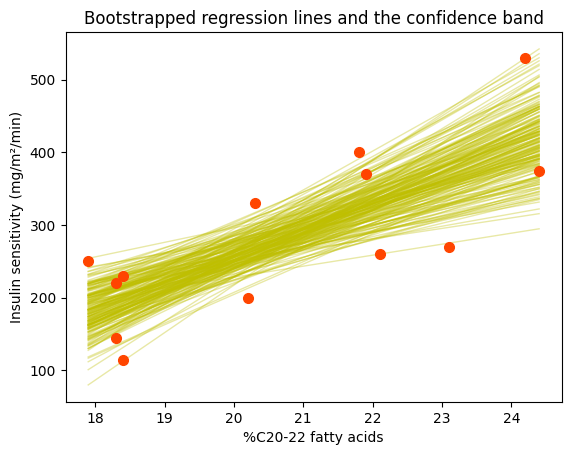

In [37]:
# Visualize the variability of the regression line
for i in range(200):
    plt.plot(X, bs_slope_reps[i] * X + bs_intercept_reps[i], 'y-', lw=1, alpha=0.35)

plt.plot(X, y, '.', ms=14, c='orangered', linestyle='None')
plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Bootstrapped regression lines and the confidence band");

We can also use the [`sns.regplot()` function in Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html) to visualize the variability of the regression line based on bootstrapping. The 'n_boot' parameter controls the number of bootstrap iterations used to estimate the confidence interval.

Notice how the spread of the bootstrapped lines in the Seaborn plot is similar to the spread we observed in the previous plot.

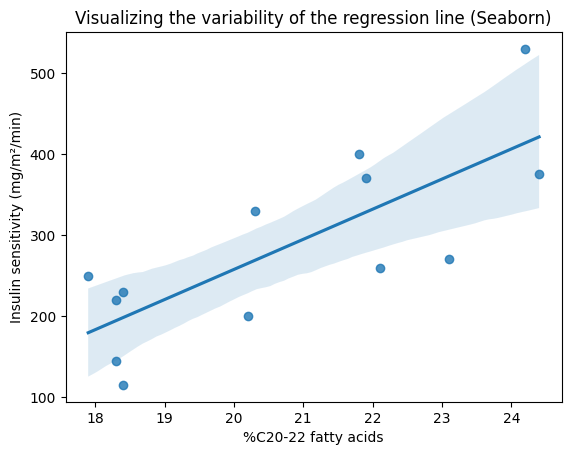

In [38]:
# Visualize the variability of the regression line (Seaborn)
sns.regplot(x=X, y=y, ci=95, n_boot=1000, seed=111,)
plt.xlabel('%C20-22 fatty acids')
plt.ylabel('Insulin sensitivity (mg/m²/min)')
plt.title("Visualizing the variability of the regression line (Seaborn)");

While the case resampling (empirical) bootstrap method we discussed throughout this subsection is useful for linear regression, it's not always the best choice. For instance, when the data has influential observations (points with extreme x-values that strongly influence the regression line), this method might not perform well. In such cases, we can turn to alternative bootstrapping techniques:
- Residual bootstrap: this approach focuses on resampling the residuals (the differences between the actual and predicted y-values). We generate bootstrap replicates of the residuals and then add them to the predicted y-values to create new bootstrap samples. This helps address the impact of influential observations.
- Wild bootstrap: this method is particularly helpful when the variability of the residuals isn't constant across the range of predictor values (heteroscedasticity). It uses a more complex procedure to generate bootstrap samples that better account for this varying variability.
- Bootstrap for logistic regression: bootstrapping can also be adapted for logistic regression, a type of regression used when the response variable is categorical (e.g., predicting whether a customer will make a purchase), that we will discussed in a future chapter.

These are just a few examples of the diverse range of bootstrapping methods available for linear regression. The choice of method depends on the specific characteristics of your data and the goals of your analysis. For a deeper dive into these techniques, we can refer to resources like the [lecture you linked from the University of Washington](https://faculty.washington.edu/yenchic/17Sp_403/Lec6-bootstrap_reg.pdf), which provides detailed explanations and examples.

#### Permutation test for P values

To calculate a P value for our linear regression model, we need a way to *simulate the null hypothesis*, i.e., the scenario where there's *no relationship between the predictor and response variables*. Permutation testing provides a solution. Here's how it works:

1. **Break the association:** we randomly shuffle the values of the predictor variable (X) while keeping the response variable (y) fixed. This effectively eliminates any real relationship between them.
2. Fit the model: we fit the same linear regression model to this permuted data (shuffled X and original y) and calculate a test statistic that reflects the strength of the (now non-existent) relationship. We have several options for this test statistic:
    * F-statistic: measures the overall model fit (we will introduce this statistic in the next chapter)
    * t-statistic for a specific coefficient: tests the significance of a particular predictor, similar to what we did in the chapters on comparing univariate and bivariate data, and using the formula defined in the previous section $t = \frac{\hat{\beta}_j}{s_{\hat{\beta}_j}}$
    * R²: represents the proportion of variance in y explained by X, though its tendency to skew towards zero under the null hypothesis reduces the statistical power for detecting a true effect when one exists
3. Repeat: we repeat steps 1 and 2 many times (e.g., 1,000 or more). Each time, we get a test statistic calculated under the null hypothesis (no real relationship).
4. Construct the null distribution: this collection of test statistics from the permuted datasets forms the *permutation distribution*. It shows us what kinds of test statistic values we'd expect to see if there were truly no relationship between X and y.
5. Calculate the P value: we compare the test statistic from our original data to this permutation distribution. The P value is the proportion of permuted test statistics that are as extreme as, or more extreme than, the observed statistic.

This approach allows us to estimate the P value without relying on the standard assumptions of linear regression, making it a more robust method in many situations.

In [39]:
def permute_for_linreg(X, y):
    """
    Generates a permuted sample for linear regression 
    under the null hypothesis of no relationship.

    Args:
      X: The predictor variable array.
      y: The response variable array.

    Returns:
      A new array with the values of x permuted randomly,
      and the original y array.
    """
    # Permute the values of X
    permuted_X = np.random.permutation(X)

    return permuted_X, y

In [110]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 9999 permutation replicates of the t-statistic for slope coefficient
B = 10**4 - 1 # 99 rule
perm_slope_t = np.empty(B)

# Generate permuted coefficients
for i in range(B):
    # Permute the data
    X_perm, y = permute_for_linreg(X, y)
    
    # Fit the model to the permuted data and extract slope and its SE
    res = linregress(X_perm, y)
    perm_slope_t[i] = res.slope / res.stderr # type: ignore

# Print the first 6 replicate bootstrapped t-statistic for the slope
print("Permuted t-statistic for β1:", perm_slope_t[:6])

Permuted t-statistic for β1: [-0.30696831  0.34960778 -0.22120215 -1.72146729  2.21105111  0.1506495 ]


In [107]:
np.random.seed(111)

# Same using a more pythonic approach
perm_slope_t = np.array([
    pg.linear_regression(
        np.random.permutation(X),y).iloc[-1, 3]  # T for last coeff (slope)
    for _ in range(B)
])

# Print the first 6 replicate bootstrapped t-statistic for the slope
print("Permuted t-statistic for β1:", perm_slope_t[:6])

Permuted t-statistic for β1: [-0.30696831  0.34960778 -0.22120215 -1.72146729  2.21105111  0.1506495 ]


In [114]:
# Calculate the P value using the distribution of bootstrap t-statistic for β1
# in permuted pairs considering the direction of the observed t-statistic
# slope_tvalue = results_statsmodels.tvalues.iloc[-1]
if slope_tvalue >= 0:
    p_value_slope_t_perm_up = np.mean(perm_slope_t >= slope_tvalue)
    p_value_slope_t_perm_low = np.mean(perm_slope_t <= -slope_tvalue)
else:
    p_value_slope_t_perm_low = np.mean(perm_slope_t <= slope_tvalue)
    p_value_slope_t_perm_up = np.mean(perm_slope_t >= -slope_tvalue)

p_value_slope_t_perm_1t = p_value_slope_t_perm_up if slope_tvalue >= 0 else p_value_slope_t_perm_low

# Print the P values
print(f"One-sided P value for permutation β1 t-statistic = {p_value_slope_t_perm_1t:.5f}")

One-sided P value for permutation β1 t-statistic = 0.00120


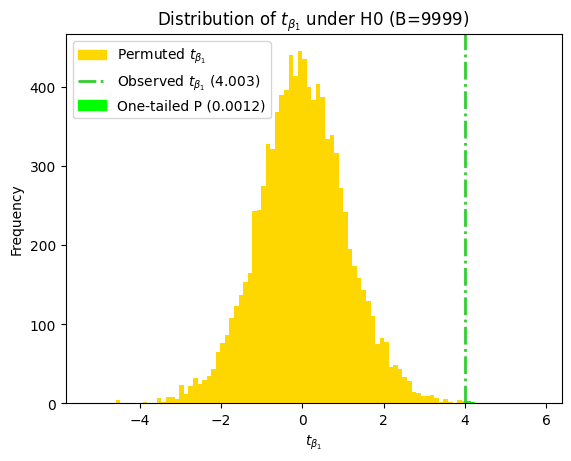

In [115]:
# Plot the histogram of the permuted β1 t-statistics
hist, bins, patches = plt.hist(
    perm_slope_t,
    density=False,
    bins=int(B**.5),
    color='gold',
    # alpha=0.75,
)

# Annotate the observed mean difference
plt.axvline(
    x=slope_tvalue,
    color='limegreen',
    linestyle='-.', lw=2,
    label=r"Observed $t_{\beta_1}$ "f"({slope_tvalue:.3f})")

# Determine the direction of the observed difference and plot accordingly
if r_squared_scipy >= 0: # type: ignore
    # Plot the histogram of the mean differences >= observed mean difference 
    extreme_diffs = perm_slope_t[perm_slope_t >= slope_tvalue]
    # Change the color of the bars based on the direction parameter
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge >= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore
else:
    # Plot the histogram of the mean differences <= observed mean difference
    extreme_diffs = perm_slope_t[perm_slope_t <= slope_tvalue]
    for i, bin_edge in enumerate(bins[:-1]):
        if np.any(bin_edge <= extreme_diffs):
            patches[i].set_facecolor('lime') # type: ignore

# Add labels and title
plt.xlabel(r'$t_{\beta_1}$')
plt.ylabel('Frequency')
plt.title(r"Distribution of $t_{\beta_1}$ under H0 "f"(B={B})")

# Create a copy of the original patch for the legend
original_patch = mpatches.Patch(color='gold', label=r'Permuted $t_{\beta_1}$')
# Create a patch for the legend
p_value_patch = mpatches.Patch(
    color='lime', label=fr'One-tailed P ({p_value_slope_t_perm_1t:.4f})')

# Add the patches to the legend
plt.legend(handles=[original_patch, plt.gca().lines[0], p_value_patch]); # type: ignore

As we've seen in previous chapters on univariate and bivariate analysis, and correlation analysis, we can calculate a two-tailed P value for the t-statistic in our bootstrap analysis. To do this, we sum the probabilities in both tails of the distribution. Given that the bootstrap distribution of the t-statistic for the slope coefficient ($t_{\beta_0}$) under the null hypothesis is symmetrical, we can also approximate the two-sided P value by doubling the more conservative of the two one-tailed P values.

In [70]:
# Maximum one-tail
p_value_permut_2t_max = 2 * max(p_value_slope_t_perm_low, p_value_slope_t_perm_up)

# Sum of the tails
p_value_permut_2t_sum = p_value_slope_t_perm_low + p_value_slope_t_perm_up

# Print the results
print(f"Two-tailed P value of permutation slope t (conservative) = {p_value_permut_2t_max:.5f}")
print(f"Two-tailed P value of permutation slope t (both tails) = {p_value_permut_2t_sum:.5f}")

Two-tailed P value of permutation slope t (conservative) = 0.00240
Two-tailed P value of permutation slope t (both tails) = 0.00200


Based on the low P value and its consistency with the Statsmodels and Pingouin output, we can confidently conclude that there is a statistically significant relationship between the predictor and response variables in the data. The bootstrapping approach provides additional support for this conclusion and offers insights into the uncertainty associated with the estimated relationship.

## Prediction

We've explored how to estimate the coefficients of a linear regression model, assess its assumptions, and perform inference on the coefficients. Now, let's delve into one of the primary applications of regression analysis: **prediction**.

Recall that we've already used the estimated coefficients to predict values and visualize confidence bands around the regression line. We also used predictions within the bootstrap method to assess the variability of the coefficients.

In this section, we'll expand on these ideas and explore how to use the fitted linear regression model to predict the response variable for new values of the predictor variable. We'll also discuss how to quantify the uncertainty associated with these predictions using prediction intervals.

### Making predictions

One of the primary goals of building a linear regression model is to use it for prediction. With our fitted model, we can predict the value of the response variable for a new observation, given its value on the predictor variable. Recall the equation of our simple linear regression model: $y = \hat \beta_0 + \hat \beta_1 x$. To make a prediction, we simply plug in the new value of $x$ into the equation, along with the estimated coefficients we obtained from fitting the model!

It's important to distinguish between two types of prediction:
1. **Interpolation:** this refers to predicting the response variable for a new observation where the predictor value falls *within* the range of the original data. We're essentially *using the fitted line* to estimate the response value within the observed range of the predictor.
2. **Extrapolation:** this refers to predicting the response variable for a new observation where the predictor value falls *outside* the range of the original data. We should be cautious about extrapolation, as the model's accuracy might decrease significantly when predicting outside the observed range. The relationship between the variables might not hold beyond the range of our data.

### Prediction with Python

Now that we have a fitted linear regression model, we can use it to predict the response variable for new values of the predictor variable. We can use the Statsmodels model generated ealier to make predictions by providing a new value for the predictor variable, [as explained brighlty elsewhere](https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html). However, we'll take this opportunity to introduce a [widely used machine learning library in Python: **scikit-learn (sklearn)**](https://scikit-learn.org/stable/). It provides a comprehensive and user-friendly set of tools for various **machine learning** tasks, including regression analysis. We can therefore gain experience with a popular machine learning library, expanding our toolkit for data analysis, and learning a standardized approach used for different machine learning algorithms.

In [44]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
model_sklearn = LinearRegression()

# scikit-learn requires a specific data format, think it uses vectors 
# and matrices, so either extract DataFrame, transform Series to DataFrame
X_matrix = data[['per_C2022_fatacids']]  # same as X.to_frame()
# or reshape X Series values to a 2D NumPy array
# X_matrix = X.values.reshape(-1, 1) 

# Fit the model to the data
model_sklearn.fit(X_matrix, y)

# Extract the coefficients
intercept_sklearn = model_sklearn.intercept_
slope_sklearn = model_sklearn.coef_[0]

# Print the coefficients
print("Intercept (sklearn):", intercept_sklearn)
print("Slope (sklearn):", slope_sklearn)

Intercept (sklearn): -486.54199459921057
Slope (sklearn): 37.2077457474554


Remind we previously plotted the regression line using the coefficients obtained from the NumPy linear regression model for each x-value (`slope_numpy * X + intercept_numpy`), here we use the fitted sklearn model `model_sklearn` to predict the corresponding y-values (`y_line`) for the generated x-values (`x_line`) that finally consist of the two extremity points $[\min(X), \max(X)]$. The model applies the estimated coefficients to the new x-values to calculate the predicted y-values.

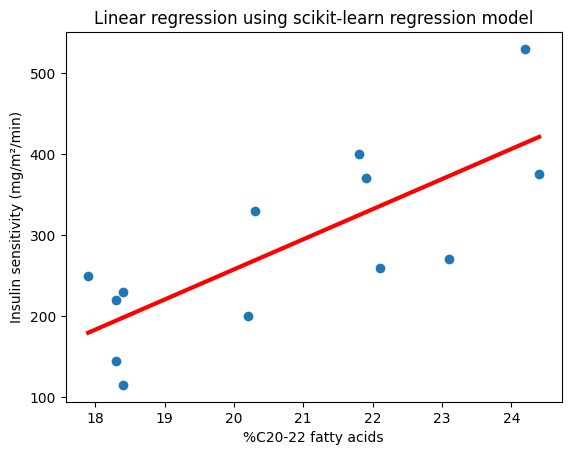

In [45]:
x_line = np.array([X.min(), X.max()])

# Predict y-values using the fitted model
y_line = model_sklearn.predict(x_line.reshape(-1, 1))  # Reshape for sklearn

# Plot the data and the fitted line
plt.scatter(X, y)
plt.plot(x_line, y_line, color="red", lw=3)  # Plot line using predicted values
plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Linear regression using scikit-learn regression model");

We can use the fitted sklearn model to predict the insulin sensitivity for new values of the predictor variable.

In [71]:
# Create new/unseen data points for prediction
X_new = np.array([20, 24])
X_new_matrix = X_new.reshape(-1, 1)  # Reshape for sklearn

# Predict the response variable for the new data points
y_pred_new = model_sklearn.predict(X_new_matrix)

# Print the predictions
for x_i, y_i in zip(X_new_matrix, y_pred_new):
    print(f"Predicted insulin sensitivity for \
{x_i[0]:.0f}%C20-22 fatty acids: {y_i:.2f} mg/m²/min")

Predicted insulin sensitivity for 20%C20-22 fatty acids: 257.61 mg/m²/min
Predicted insulin sensitivity for 24%C20-22 fatty acids: 406.44 mg/m²/min


### Model performance

In machine learning, we often evaluate the performance of a model by comparing its predictions to the actual values. This evaluation helps us understand how well the model generalizes to new, unseen data and identify areas for improvement.

We can evaluate the performance of our `model_sklearn` model using metrics like R², MSE, and RMSE, which we explored earlier in this chapter, and mean absolute error (MAE), sometimes referred to as the "Manhattan norm" because it calculates the average absolute vertical or horizontal distances between the data points and the fitted line.

These metrics offer valuable insights into how well our model fits the data and how accurately it predicts new observations. Calculating these metrics is straightforward and follows the same basic principle for all of them: we simply compare the actual values of the response variable (`y`) to the predicted values (`y_pred`) generated by the model. This comparison allows us to quantify the model's performance and understand its strengths and weaknesses.

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict y-values for all initial x-vlaues using the fitted model
y_pred = model_sklearn.predict(X_matrix.values)

# Calculate evaluation metrics
mse_sklearn  = mean_squared_error(y, y_pred)
rmse_sklearn  = np.sqrt(mse)
r2_sklearn = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print the metrics with clear labels and formatting
print(f"MSE\t: {mse_sklearn :.5f}")
print(f"RMSE\t: {rmse_sklearn :.5f}")
print(f"R²\t: {r2_sklearn :.5f}")
print(f"MAE\t: {mae :.5f}")

MSE	: 4873.95184
RMSE	: 75.89549
R²	: 0.59290
MAE	: 65.00429


We observe a slight difference in the MSE values between `statsmodels` and `sklearn`. This might be due to how each library calculates MSE, particularly regarding the use of degrees of freedom. However, the R-squared values are essentially the same, suggesting that the overall goodness of fit is consistent across the two libraries. In fact scikit-learn calculate MSE directly as the average of the squared residuals without explicitely considering degrees of freedom: $\text{MSE}^\prime = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2$, where $n$ is the number of pairs in the dataset.

In [48]:
# Calculate and print RSS/n
rss_over_n = rss / n  # results_statsmodels.nobs
print(f"RSS/n (Statsmodels): {rss_over_n:.5f}")

RSS/n (Statsmodels): 4873.95184


### Prediction intervals

We've seen how to use our linear regression model to make predictions for new observations. However, it's important to recognize that these predictions are not perfect. There will always be some uncertainty associated with them due to the inherent variability in the data and the limitations of the model.

To quantify this uncertainty, we can use **prediction intervals**. A prediction interval provides a range of plausible values within which we expect a future observation to fall with a certain level of confidence.

It's crucial to distinguish between *prediction intervals* and *confidence intervals*, which we discussed earlier. Confidence intervals quantify the uncertainty around the estimated *mean* response at a given predictor value. They tell us how confident we are in the estimated relationship between the variables. Prediction intervals quantify the uncertainty around the predicted value for a *single new observation*. They tell us how much variability we can expect in individual predictions.

The formula for calculating a prediction interval is similar to that of a confidence interval, but it includes an extra term to account for the variability of individual observations:

$$
\text{PI}(x_0) = \hat y_0 \pm t^\ast \times S \times \sqrt{1 + \frac{1}{n} + \frac{(x_0 - \bar x)^2}{\sum{(x_i - \bar x)^2}}}
$$

where:

- $\hat y_0$ is the predicted value at $x_0$
- $t^\ast$ is the critical t-value for the desired confidence level
- $S$ is the standard error of the regression (SER)
- $s$ is the number of observations
- $x_i$ are the original predictor values
- $\bar x$ is the mean of the predictor values

Remind the formula of the confidence interval and notice the extra $1$ under the square root in the prediction interval formula:

$$\text{CI}(x_0) = \hat y_0 \pm t^\ast \times S \times \sqrt{\frac{1}{n} + \frac{(x_0 - \bar x)^2}{\sum(x_i - \bar x)^2}}$$

This extra term accounts for the variability of individual observations around the predicted mean.

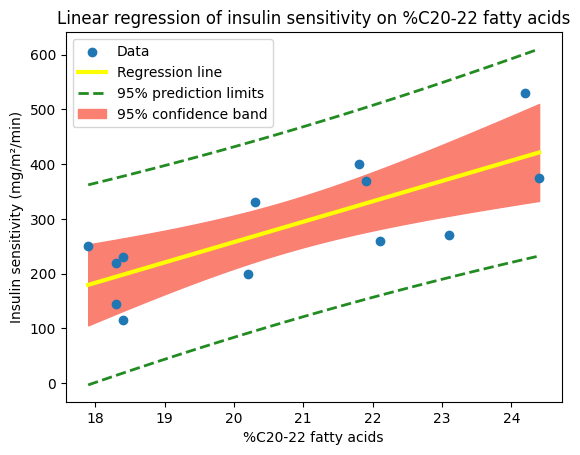

In [72]:
# Plot the data and the fitted line
plt.scatter(X, y, label="Data")
plt.plot(x_line, y_line, color="yellow", lw=3, label="Regression line")  # From sklearn

# Calculate and plot the Cis using the previous values for t*, S, n and X
x0 = np.linspace(X.min(), X.max(), 100)
y0 = model_sklearn.predict(x0.reshape(-1, 1))  # Predict values for x0
plot_ci_manual(t_crit, ser, n, X, x0, y0)  # Plot CI on the current axes

# Create a custom legend handle for the confidence band
confidence_band_patch = mpatches.Patch(color='salmon', label="95% confidence band")

# Calculate and plot prediction intervals
pi = t_crit * ser * np.sqrt(1 + 1/n + (x0 - X.mean())**2 / np.sum((X - X.mean())**2))

plt.plot(x0, y0 - pi, "--", color="forestgreen", lw=2, label="95% prediction limits")
plt.plot(x0, y0 + pi, "--", color="forestgreen", lw=2)

plt.xlabel("%C20-22 fatty acids")
plt.ylabel("Insulin sensitivity (mg/m²/min)")
plt.title("Linear regression of insulin sensitivity on %C20-22 fatty acids")

# Get the handles and labels from the automatically generated legend
handles, labels = plt.gca().get_legend_handles_labels()
# Add the confidence band patch to the handles list
handles.append(confidence_band_patch)
# Add the legend to the plot, including all labels
plt.legend(handles=handles);

Similarly to how we plotted confidence bands, we can visualize prediction interval limits using our fitted model. By leveraging its built-in capabilities, we can generate the predicted values and prediction intervals directly, using the 'obs_ci_lower' and 'obs_ci_upper' values from the prediction results.

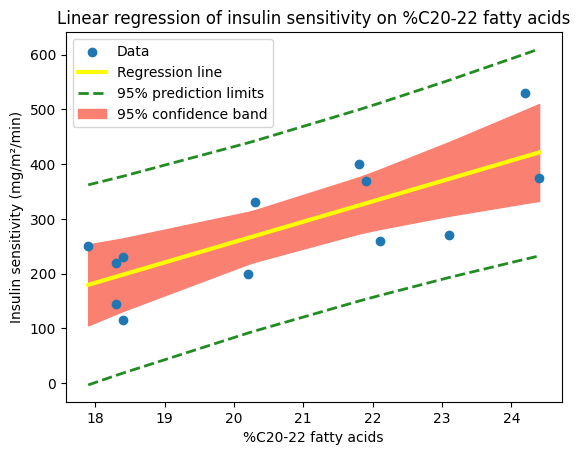

In [73]:
# Plot the data and the fitted line (Statsmodels)
ax = plt.subplot()
ax.scatter(X, y, label="Data")
ax.plot(
    X,
    results_statsmodels.fittedvalues,
    color="yellow",
    lw=3,
    label="Regression line")

# Extract confidence intervals from
predictions = results_statsmodels.get_prediction(X)
prediction_summary_frame = predictions.summary_frame(alpha=0.05)

# Plot the confidence intervals
ax.fill_between(
    X,
    prediction_summary_frame['mean_ci_lower'],
    prediction_summary_frame['mean_ci_upper'],
    color='salmon',
    zorder=0)

# Create a custom legend handle for the confidence band
confidence_band_patch = mpatches.Patch(color='salmon', label="95% confidence band")

# Calculate and plot prediction intervals
ax.plot(
    X,
    prediction_summary_frame['obs_ci_lower'],
    linestyle="--",
    color="forestgreen",
    lw=2,
    label="95% prediction limits")
ax.plot(
    X,
    prediction_summary_frame['obs_ci_upper'],
    "--",
    color="forestgreen",
    lw=2)

ax.set(
    xlabel="%C20-22 fatty acids",
    ylabel="Insulin sensitivity (mg/m²/min)",
    title="Linear regression of insulin sensitivity on %C20-22 fatty acids")

# Get the handles and labels from the automatically generated legend
handles, labels = plt.gca().get_legend_handles_labels()
# Add the confidence band patch to the handles list
handles.append(confidence_band_patch)
# Add the legend to the plot, including all labels
plt.legend(handles=handles);

Prediction intervals are always wider than confidence intervals for the same predictor value and confidence level. This is because prediction intervals account for two sources of uncertainty:

1. Uncertainty in the estimated relationship: this is the same uncertainty captured by the confidence interval
2. Random variability of individual observations: even if we knew the true relationship perfectly, individual data points would still vary around the regression line due to random factors

Prediction intervals incorporate both of these sources of uncertainty, making them wider than confidence intervals, which only account for the first source. 

In [51]:
# Print the prediction intervals for each x-value
for i, x_i in enumerate(X_new):
    # Calculate the prediction interval for the current x-value (x_i)
    pi = t_crit * ser * np.sqrt(1 + 1/n + (x_i - X.mean())**2 / np.sum((X - X.mean())**2))
    
    # Extract the predicted y-value for the current x-value (from sklearn predictions)
    y_pred_new_i = y_pred_new[i]  
    
    # Print the prediction interval information
    print(f"Prediction interval for {x_i:n}% C20-22 fatty acids:")
    print(f"  - Predicted value: {y_pred_new_i:.5f} mg/m²/min")
    print(f"  - Prediction interval: [{y_pred_new_i - pi:.4f}, {y_pred_new_i + pi:.4f}] mg/m²/min")

Prediction interval for 20% C20-22 fatty acids:
  - Predicted value: 257.61292 mg/m²/min
  - Prediction interval: [83.6455, 431.5804] mg/m²/min
Prediction interval for 24% C20-22 fatty acids:
  - Predicted value: 406.44390 mg/m²/min
  - Prediction interval: [220.5224, 592.3654] mg/m²/min


We can also leverage the Statsmodels library to calculate prediction intervals. As we saw for the confidence interval, the `get_prediction` method provides comprehensive prediction results, including prediction intervals. We can extract these intervals and the predicted values using the `summary_frame` method, and store them in a DataFrame with clear column names for the predicted values ('y_pred') and the lower and upper bounds of the prediction intervals ('pi_lo' and 'pi_up').

In [52]:
# Calculate prediction intervals and extract relevant values
predictions = results_statsmodels.get_prediction(exog=dict(per_C2022_fatacids=X_new))
pred_intervals = predictions.summary_frame(alpha=0.05)[['mean', 'obs_ci_lower', 'obs_ci_upper']]
pred_intervals = pred_intervals.rename(columns={
    "mean": "y_pred", 
    "obs_ci_lower": "pi_lo", 
    "obs_ci_upper": "pi_up"
})

print(pred_intervals)

       y_pred       pi_lo       pi_up
0  257.612920   83.645457  431.580383
1  406.443903  220.522381  592.365426


## Advanced techniques

### Maximum likelihood estimation

Throughout this chapter, we've focused on the ordinary least squares (OLS) method for estimating the coefficients in our simple linear regression model.  Recall that we briefly mentioned another powerful method for coefficient estimation: **maximum likelihood estimation (MLE)**.  

While OLS is intuitive and widely used, MLE offers some advantages, particularly when we have specific knowledge about the distribution of the errors. In this final section, we'll explore the concept of MLE and how it can be applied in linear regression.

#### How MLE works

MLE is a powerful method used to *estimate the parameters of a probability distribution*. It's particularly useful for choosing between different models and making inferences about the population from which the data is sampled.

Mathematically, MLE works by maximizing the **likelihood function ($\ell$)**. This function represents the probability of observing our data, given a set of parameters for the underlying probability distribution. In the case of independent and identically distributed (i.i.d.) data, the likelihood function is simply the *product of the probability density function (PDF) values* over the entire sample.

Since MLE involves a product of probabilities, it's often more convenient to work with the **log-likelihood function**. This transforms the product into a sum, making it easier to maximize. We can express the log-likelihood function as:

$$\ell (\Theta; Y) = \sum \log p(y_i | \Theta)$$

where $\Theta$ represents the set of parameters we want to estimate, $Y$ is the random variable representing our data, $p$ is the probability density function associated with $Y$, and $y_i$ are the individual observed data points.

MLE aims to find the parameter values $\hat \Theta$ that maximize this log-likelihood function:

$$\hat \Theta = \operatorname{arg max}_\Theta l(\Theta; Y)$$

#### MLE and linear regression

Interestingly, in the case of linear regression with the assumption of normally distributed errors, the regression line determined by the OLS method is identical to the line determined by MLE. This means that minimizing the sum of squared errors (OLS) is equivalent to finding the parameter values that maximize the likelihood of observing the data (MLE), given the normality assumption. MLE is actually using the observed y-values and the assumed distribution of the errors (residuals) to estimate the coefficients.

MLE is a method that is used to estimate parameters of a probablililty distribution, and is usefull for model choosing. It is done by maximizing the likelihood function. In the case that we are interested in (i.e. independant identically distributed) this likelihood function is simply the product of a density function values over the entire sample. It is a parametric method since it needs to have an a priory about the density function for it to work. Since it is a product, most of the time we would rather work with the log likelihood function which transforms this product into a sum.

#### Visualization of MLE

To illustrate this concept, we'll keep the intercept constant and vary the slope of the regression line. This will generate different sets of residuals, which we'll then use to demonstrate the MLE process.

For each set of residuals, we'll plot a normal distribution centered at zero. This represents the ideal scenario in linear regression where the errors are normally distributed with a mean of zero. We'll also use the standard deviation calculated from each set of residuals to define the spread of the normal distribution.

This visualization will help us understand how the likelihood of observing the residuals changes as we vary the slope of the regression line. It will also demonstrate how MLE aims to find the slope value that maximizes this likelihood, effectively minimizing the residuals and achieving the best fit for our data.

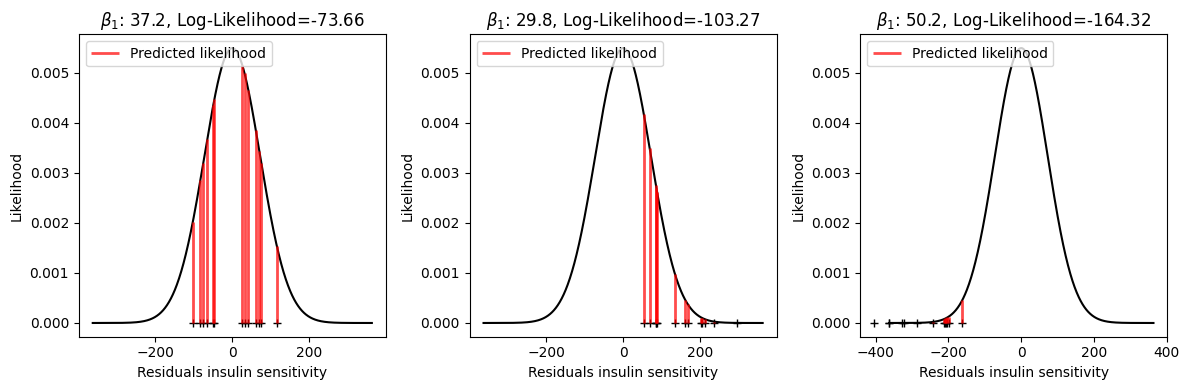

In [75]:
from matplotlib import collections as mc

# Define different slopes based on the coefficient obtained with OLS
slopes = [slope_sklearn, slope_sklearn * 0.8, slope_sklearn * 1.35]

# Create subplots
fig, axes = plt.subplots(ncols=len(slopes), figsize=(12, 4))

# Estimate the standard deviation of the residuals
# Calculate the residuals from the scikit-learn model and its predictions
residuals = y - y_pred
resid_std = residuals.std()

# Optimize the x-range based on the OLS residuals
x_min = -5 * resid_std
x_max = 5 * resid_std
x_range = np.linspace(x_min, x_max, 1000)

# Iterate through different slopes
for i, slope in enumerate(slopes):
    # Fit the model with the current slope
    model = LinearRegression()
    model.intercept_ = intercept_sklearn  # Keep the intercept constant
    model.coef_ = np.array([slope])  # Set the new slope
    y_pred_i = model.predict(X_matrix)
    residuals_mle = y - y_pred_i

    ax = axes[i]
    # Plot predicted values as crosses at the bottom
    ax.plot(residuals_mle, [0] * len(residuals_mle), 'k+')
    # Plot the normal distribution
    ax.plot(x_range, norm.pdf(x_range, loc=0, scale=resid_std), 'k')

    # Calculate predicted likelihoods
    predicted_likelihoods = norm.pdf(residuals_mle, loc=0, scale=resid_std)
    predicted_coords = [[v, p] for v, p in zip(residuals_mle, predicted_likelihoods)]

    # Plot segments
    segments = [[[v, 0], [v, p]] for v, p in zip(residuals_mle, predicted_likelihoods)]
    lc = mc.LineCollection(
        segments,
        colors='red',
        linewidths=2,
        alpha=0.7,
        label='Predicted likelihood')
    ax.add_collection(lc)

    # Calculate and display log-likelihood
    log_likelihood = np.sum(np.log(predicted_likelihoods))
    ax.set_title(
        r"$\beta_1$: "f"{slope:.1f}, Log-Likelihood={log_likelihood:.2f}")
    ax.set_xlabel('Residuals insulin sensitivity')
    ax.set_ylabel('Likelihood')
    ax.legend(loc=2)

plt.tight_layout();

In the previous visualization, we kept the intercept of our regression model constant and varied the slope. This generated different sets of residuals, effectively shifting them left or right along the x-axis.

For each set of residuals, we calculated the likelihood of observing those residuals under a normal distribution with a mean of zero and the same standard deviation. This demonstrated how the likelihood changed as we shifted the residuals, highlighting the principle behind MLE.

Typically, the MLE algorithm would search for the best values of both the intercept and the slope coefficients, along with the standard deviation of the errors, to find the combination of parameters that maximizes the likelihood of observing the data. In this specific case, where we kept the intercept constant and the errors are assumed to be normally distributed, it has been mathematically proven that the MLE solution for the slope coefficient is identical to the one obtained using the OLS method.

Multiplying these likelihoods together (or, equivalently, summing their logarithms) was exactly what MLE did. It tried different parameter values (in this case, the slope, which indirectly affected the mean of the residuals) to find the combination that maximized the likelihood of observing the data.

While we focus on the case where the residuals are assumed to have a mean of zero in linear regression, it's important to remember that this is not a general requirement of MLE. MLE can be applied to various distributions and models, where the mean might not be zero. However, the zero-mean assumption is common in linear regression due to its benefits in terms of unbiasedness, interpretability, and mathematical convenience.

In [76]:
# Print the log-likelihood from statsmodels
print(f"Log-likelihood (Statsmodels):\t{results_statsmodels.llf:.9f}")

# Print the log-likelihood from the previous visualization
print(f"Log-likelihood (MLE):\t\t{np.sum(
    np.log(norm.pdf(residuals, loc=0, scale=resid_std))):.9f}")

Log-likelihood (Statsmodels):	-73.641993232
Log-likelihood (MLE):		-73.662270832


Recall the Statsmodels results table, which includes the log-likelihood value. We can extract this value directly from the results object. This log-likelihood is very similar to the one we obtained using the coefficients estimated with the OLS method, confirming the close relationship between OLS and MLE in the context of linear regression with normally distributed errors.

### Generalized linear models

Throughout this chapter, we've focused on simple linear regression where we modeled the relationship between the predictor variable and the *mean* of the response variable using a linear function.  We've also assumed that the errors (the deviations of the observed values from the mean) are normally distributed.

However, there are situations where these assumptions might not hold. The response variable might not be continuous or normally distributed, or the relationship between the variables might not be strictly linear. In such cases, **generalized linear models (GLMs)** offer a more flexible framework.

GLMs extend the concepts of linear regression to [accommodate a wider range of response variables and relationships](https://en.wikipedia.org/wiki/Generalized_linear_model). They allow us to:

- Model non-normal response variables: we can use GLMs to model response variables that follow different distributions, such as count data (Poisson regression) or binary data (logistic regression).
- Handle non-linear relationships: GLMs can incorporate link functions that transform the relationship between the predictors and the response, allowing us to model non-linear patterns.

GLM relies on three key components: a **random component** that specifies the probability distribution of the response variable, a **systematic component** that defines the linear predictor, which is a combination of the predictor variables, and a **link function** that connects the random and systematic components, specifying the relationship between the mean of the response variable and the linear predictor.

GLMs offer a flexible and interpretable framework with well-established methods for handling various response variables and relationships, extending the concepts of simple linear regression to a wider range of real-world problems. They open up possibilities for modeling more complex data and relationships, providing a powerful tool for tackling diverse research questions.

While a detailed exploration of GLMs is beyond the scope of this chapter on simple linear regression, it's essential to be aware of their existence and potential applications. As we progress in our statistical journey, we'll encounter GLMs and other advanced techniques that build upon the foundation laid by simple linear regression.

## Conclusion

In this chapter, we embarked on a journey through the core concepts of simple linear regression. We started by establishing the foundational principles of this powerful technique, learning how to represent relationships between variables using a linear model and the method of Ordinary Least Squares (OLS). We then dove into the practicalities of building and assessing these models in Python, exploring various libraries such as SciPy, Statsmodels, Pingouin, and scikit-learn (our first contact with machine learning), each offering unique advantages and functionalities.

We learned how to estimate the coefficients of the linear equation, interpret their meaning in the context of our data (the relationship between insulin sensitivity and the percentage of C20-22 fatty acids in muscle phospholipids), and assess the overall fit of the model using metrics like R², MSE, and RMSE. We discovered how these metrics provide different perspectives on the model's performance, with R² capturing the proportion of variance explained and MSE/RMSE quantifying the prediction error.

We then delved into the crucial assumptions that underpin linear regression, recognizing the importance of linearity, homoscedasticity, and normality of errors. We used different diagnostic tools, including residual analysis, visualizations like histograms and Q-Q plots of the residuals, and statistical tests, to critically evaluate our models and identify potential areas for improvement. We discovered how to interpret the diagnostic table provided by `statsmodels` to gain further insights into the model's validity.

We also discussed statistical inference, learning how to quantify the uncertainty associated with our estimated coefficients and predictions. Confidence intervals and P values appeared to be essential in assessing the significance of relationships and drawing meaningful conclusions from the analyses. We explored how to calculate these statistics using both traditional methods and bootstrapping, a powerful resampling technique that allows us to estimate the sampling distribution of the coefficients and perform inference without relying on strong distributional assumptions.

Furthermore, we harnessed the predictive power of linear regression, using our models to forecast outcomes for new observations and understanding the limitations of extrapolation. We learned how to construct prediction intervals, acknowledging the inherent uncertainty in predicting individual values. We also discovered how to visualize the variability of the regression line and the confidence band using bootstrapping, gaining a deeper intuition for the uncertainty in our estimates.

Finally, we glimpsed the broader landscape of regression analysis, touching upon advanced techniques like Maximum Likelihood Estimation (MLE) and Generalized Linear Models (GLMs). We explored the principle of MLE, understanding how it aims to find the parameter values that maximize the likelihood of observing the data. We also briefly introduced GLMs as a more flexible framework for handling different types of response variables and relationships, paving the way for future explorations of more complex models and data structures.

This chapter provided a solid foundation in building and interpreting a single linear regression model. However, we often encounter situations where multiple models compete to best represent the data. In the next chapter, we'll explore techniques to compare these models, evaluate their performance, and select the best one based on accuracy, interpretability, and generalizability. This will equip us with the tools and knowledge for effective model selection in our data analysis.

## Cheat sheet

### Fitting model to data

```python
# With NumPy
import numpy as np
np.polyfit(X, y, deg=1)

# With SciPy
from scipy.stats import linregress
linregress(X, y)

# With Pingouin
import pingouin as pg
pg.linear_regression(X, y)

# With Statsmodels
import statsmodels.formula.api as smf

model_statsmodels = smf.ols("y ~ X", data=data)
results_statsmodels = model_statsmodels.fit()
# Print the whole results
results_statsmodels.summary2()

# Extract the coefficient table
results_statsmodels.summary().tables[1]

# Print the parameters
results_statsmodels.params
```

### Assessing model fit

```python
# All of the parameters are extracted from Statsmodels
# TSS and RSS (SSR)
results_statsmodels.centered_tss
results_statsmodels.ssr

# R²
results_statsmodels.rsquared

# Adjusted-R²
results_statsmodels.rsquared_adj

# MSE and RMSE
results_statsmodels.mse_resid
np.sqrt(results_statsmodels.mse_resid)
```

### Assumptions and diagnostics

#### Residual analysis

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
residuals = results_statsmodels.resid
fitted_values = results_statsmodels.fittedvalues
plt.scatter(fitted_values, residuals)

# Histrogram of residuals
sns.histplot(residuals)

# Q-Q plot
from statsmodels.api import qqplot
qqplot(residuals, fit=True, line='45')

# Scale-location plot
sns.regplot(
    x=fitted_values,
    y=np.sqrt(
        np.abs(
            results_statsmodels.get_influence().resid_studentized_internal
        )
    ),
    ci=None,
    lowess=True)
```

#### Diagnostic tests

```python
# Extract the diagnostic table from Statsmodel results
results_statsmodels.summary().tables[2]

# Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(
    results_statsmodels.resid,
    results_statsmodels.model.exog)

# Influence summary frame
results_statsmodels.get_influence().summary_frame()
```

### Statistical inference and uncertainty

#### P value and confidence intervals

```python
# SER = sqrt(RSS / Df_residuals)
ser = np.sqrt(
    results_statsmodels.ssr / results_statsmodels.df_resid
)

# Extract the coefficient table with P and CI
results_statsmodels.summary().tables[1]

# Extract confidence interval limits from Statsmodels predictions
results_statsmodels.get_prediction(X).summary_frame()[
    ['mean_ci_lower', 'mean_ci_upper']]
```

#### Bootstrapping

##### Resampling

```python
# Set the number of replicates
B = 10_000

# Generate bootstrap replicates of the intercept and slope
bs_slope_reps, bs_intercept_reps = np.array([
    np.polyfit(X[bs_inds], y[bs_inds], 1)
    for bs_inds in np.random.choice(
        np.arange(len(X)), size=(B, len(X)), replace=True)
]).T  # Transpose to separate intercepts and slopes

# Calculate the means, standard errors, and 95% CIs
# for the slope coefficient (samme applied to the intercept coefficient)
bs_slope_m = np.mean(bs_slope_reps)
bs_slope_s = np.std(bs_slope_reps, ddof=1)
np.percentile(bs_slope_reps, [2.5, 97.5])

# Calculate the 95% normal bootstrap CI for the slope
from scipy.stats import norm
z_crit = norm.ppf((1 + .95)/2)  # 95% confidence level
(
    bs_slope_m - z_crit * bs_slope_s,
    bs_slope_m + z_crit * bs_slope_s
)

# Visualizing the variability of the regression line
sns.regplot(x=X, y=y, ci=95, n_boot=1000)
```

##### Permutation

```python
# Generate permutation replicates of the t-statistic for slope coefficient
B = 10**4 - 1 # 99 rule
perm_slope_t = np.array([
    pg.linear_regression(
        np.random.permutation(X),y).iloc[-1, 3]  # T for last coeff (slope)
    for _ in range(B)
])

# Compute one-tailed (1t) and two-tailed (2t) P values
observed_t_slope = results_statsmodels.tvalues.iloc[-1]
if observed_t_slope >= 0:
    p_value_slope_t_perm_up = np.mean(perm_slope_t >= observed_t_slope)
    p_value_slope_t_perm_low = np.mean(perm_slope_t <= -observed_t_slope)
else:
    p_value_slope_t_perm_low = np.mean(perm_slope_t <= observed_t_slope)
    p_value_slope_t_perm_up = np.mean(perm_slope_t >= -observed_t_slope)

p_value_slope_t_perm_1t = p_value_slope_t_perm_up if slope_tvalue >= 0 else p_value_slope_t_perm_low

p_value_permut_2t_max = 2 * max(p_value_slope_t_perm_low, p_value_slope_t_perm_up)  # Conservative
p_value_permut_2t_sum = p_value_slope_t_perm_low + p_value_slope_t_perm_up  # Sum of the tails
```

### Prediction

```python
from sklearn.linear_model import LinearRegression

model_sklearn = LinearRegression()
X_matrix = data[['per_C2022_fatacids']]  # Matrix format requirement for sklearn
model_sklearn.fit(X_matrix, y)

# Extract the coefficients
intercept_sklearn = model_sklearn.intercept_
slope_sklearn = model_sklearn.coef_[0]

# Create new/unseen data points for prediction
X_new_matrix = np.array([20, 24]).reshape(-1, 1)

# Predict
model_sklearn.predict(X_new_matrix)

# Model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict y-values for all initial x-vlaues using the fitted model
y_pred = model_sklearn.predict(X_matrix.values)

# Calculate MSE, RMSE, R² and MAE metrics
mean_squared_error(y, y_pred)  # DF=n
np.sqrt(mse)
r2_score(y, y_pred)
mean_absolute_error(y, y_pred)

# Calculate prediction intervals and extract relevant values
predictions = results_statsmodels.get_prediction(exog=dict(X=np.array([20, 24])))
predictions.summary_frame(alpha=0.05)[
    ['mean', 'obs_ci_lower', 'obs_ci_upper']]
```

### Advanced techniques

```python
# Log-likelihood
results_statsmodels.llf
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [77]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'pingouin', 'statsmodels', 'scikit-learn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
scipy: 1.14.1
pingouin: 0.5.5
statsmodels: 0.14.2
scikit-learn: 1.5.1
